<a href="https://colab.research.google.com/github/Deadline430/SL_REPORT_2025/blob/main/US_Accidents_DT_SVM_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare the packages for this project

In [ ]:
# --- Installation Commands ---
# Run these commands if you don't have the necessary packages installed in your environment.
!pip install --upgrade pandas scikit-learn matplotlib numpy plotly psutil scipy torch memory_profiler

# --- Import Required Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn # Import sklearn directly to get version
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, learning_curve, validation_curve, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import pointbiserialr
import time
import platform
import psutil
import resource
import torch
import memory_profiler

print("\n--- Environment Information ---")
print(f"Python Version: {platform.python_version()}")
print(f"System: {platform.system()} {platform.release()}")
print(f"Processor: {platform.processor()}")
print(f"Total RAM: {round(psutil.virtual_memory().total / (1024**3), 2)} GB")



Libraries imported successfully.
Pandas version: 2.2.2
NumPy version: 2.0.2
Matplotlib version: 3.10.0
Plotly version: 5.24.1
Altair version: 5.5.0
Scikit-learn version: 1.6.1


## View and Preprocessing the Dataset
### Dataset Overview


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CS Master 2025/CS7641 Machine Learning/SL Report/Accident/US_Accidents_March23_1M_rows.csv')
# Display the first 5 rows of the DataFrame
pd.set_option('display.max_columns', None)
display(df.head())
# Get information about the DataFrame, including data types and non-null values
display(df.info())
# Get descriptive statistics for numerical columns
display(df.describe())
# Get descriptive statistics for categorical columns
display(df.describe(include='object'))

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-5716155,Source1,2,2021-04-15 02:20:35,2021-04-15 11:00:00,44.987784,-117.895987,44.982035,-117.890705,0.474,An unconfirmed report of hazardous debris has ...,I-84 E,North Powder,Baker,OR,97867,US,US/Pacific,KBKE,2021-04-15 01:53:00,29.0,24.0,72.0,26.51,10.0,SSE,5.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-5801081,Source1,2,2021-05-26 20:28:06,2021-05-26 22:43:50,40.768687,-73.882166,40.771377,-73.876336,0.357,NYSDOT - Region 11: Crash on Grand Central Par...,Grand Central Pkwy,East Elmhurst,Queens,NY,11369,US,US/Eastern,KLGA,2021-05-26 20:15:00,77.0,77.0,58.0,29.85,10.0,SSW,15.0,0.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2,A-1943129,Source2,3,2019-08-30 17:44:40,2019-08-30 19:14:39,29.438782,-98.477440,NaN,NaN,0.000,Accident on I-35 Northbound at I-37.,I-35 S,San Antonio,Bexar,TX,78215,US,US/Central,KSAT,2019-08-30 17:51:00,97.0,97.0,32.0,29.07,10.0,NE,7.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,A-4310209,Source1,2,2022-04-25 16:45:00,2022-04-25 16:59:30,37.700647,-121.796590,37.700127,-121.778560,0.986,Slow traffic on I-580 E from Isabel Ave/Exit 5...,I-580,Livermore,Alameda,CA,94551,US,US/Pacific,KLVK,2022-04-25 16:53:00,73.0,73.0,39.0,29.56,10.0,WNW,17.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6337658,Source1,2,2021-08-15 23:48:00,2021-08-16 02:12:02,39.926416,-75.144982,39.925783,-75.144733,0.046,Multi vehicle crash on CHRISTOPHER COLUMBUS BL...,S Swanson St,Philadelphia,Philadelphia,PA,19148,US,US/Eastern,KPHL,2021-08-15 23:54:00,73.0,73.0,73.0,30.18,10.0,CALM,0.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1000000 non-null  object 
 1   Source                 1000000 non-null  object 
 2   Severity               1000000 non-null  int64  
 3   Start_Time             1000000 non-null  object 
 4   End_Time               1000000 non-null  object 
 5   Start_Lat              1000000 non-null  float64
 6   Start_Lng              1000000 non-null  float64
 7   End_Lat                559465 non-null   float64
 8   End_Lng                559465 non-null   float64
 9   Distance(mi)           1000000 non-null  float64
 10  Description            1000000 non-null  object 
 11  Street                 998657 non-null   object 
 12  City                   999970 non-null   object 
 13  County                 1000000 non-null  object 
 14  State              

None

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1000000.000000,1000000.000000,1000000.000000,559465.000000,559465.000000,1000000.000000,978502.000000,740803.000000,977186.000000,981491.000000,976727.000000,925612.000000,713988.000000
mean,2.212761,36.202152,-94.699695,36.259210,-95.705589,0.560904,61.659418,58.227167,64.831575,29.538818,9.086883,7.683971,0.008295
std,0.487555,5.072673,17.389692,5.269295,18.107889,1.760586,19.011344,22.388065,22.816223,1.010918,2.690995,5.297879,0.107411
min,1.000000,24.560688,-124.548074,24.570107,-124.545748,0.000000,-89.000000,-89.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,33.393654,-117.212913,33.461580,-117.748612,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.828306,-87.773902,36.181381,-88.009849,0.030000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.085682,-80.351911,40.171482,-80.243575,0.464000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,49.002201,-67.606864,48.999280,-67.606864,162.500000,196.000000,196.000000,100.000000,58.630000,111.000000,254.300000,23.970000


,ID,Source,Start_Time,End_Time,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,1000000,1000000,1000000,1000000,1000000,998657,999970,1000000,1000000,999736,1000000,998982,997050,984163,976955,977204,996970,996970,996970,996970
unique,1000000,3,935695,968016,746211,129945,10820,1707,49,216456,1,4,1961,387405,24,118,2,2,2,2
top,A-1758589,Source1,2021-01-26 16:16:13,2021-11-22 08:00:00,A crash has occurred causing no to minimum del...,I-95 N,Miami,Los Angeles,CA,91761,US,US/Eastern,KCQT,2022-03-13 01:53:00,CALM,Fair,Day,Day,Day,Day
freq,1,559465,35,20,1291,10182,24085,68269,225360,1432,1000000,463366,15186,179,124424,330601,690482,737211,786694,825571


In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Iterate through categorical columns and print value counts
for col in categorical_cols:
    print(f"Value counts for '{col}':")
    display(df[col].value_counts())
    print("-" * 30) # Print a separator for better readability

Value counts for 'ID':


,count
ID,
A-1758589,1
A-5089963,1
A-865022,1
A-1254345,1
A-7604253,1
...,...
A-6337658,1
A-4310209,1
A-1943129,1


------------------------------
Value counts for 'Source':


,count
Source,
Source1,559465
Source2,427852
Source3,12683


------------------------------
Value counts for 'Start_Time':


,count
Start_Time,
2021-01-26 16:16:13,35
2021-11-21 18:37:51,19
2021-02-16 06:42:43,18
2021-02-16 06:43:35,16
2021-01-26 16:17:33,15
...,...
2020-03-11 07:57:58,1
2022-08-03 13:26:45,1
2017-11-13 16:08:24,1


------------------------------
Value counts for 'End_Time':


,count
End_Time,
2021-11-22 08:00:00,20
2020-12-17 03:45:00,11
2020-02-14 00:00:00,10
2021-03-02 23:59:00,8
2022-08-04 14:28:11,8
...,...
2023-01-13 19:34:04,1
2022-02-25 09:14:30,1
2020-09-08 08:34:54,1


------------------------------
Value counts for 'Description':


,count
Description,
A crash has occurred causing no to minimum delays. Use caution.,1291
Accident,822
An unconfirmed report of a crash has been received. Use caution.,489
A crash has occurred use caution.,389
A crash has occurred with minimal delay to traffic. Prepare to slow or move over for worker safety.,368
...,...
Incident on SC-41 near MAIDEN DOWN RD Drive with caution.,1
Accident on CA-17 Northbound at Spanish Oaks.,1
Accident on Old Wards Ferry Rd from Justice Center Dr to Highway 108.,1


------------------------------
Value counts for 'Street':


,count
Street,
I-95 N,10182
I-95 S,9820
I-5 N,9207
I-10 E,7318
I-10 W,6882
...,...
Kings Garden Rd,1
Saint Regis Pl,1
S Greendale Dr,1


------------------------------
Value counts for 'City':


,count
City,
Miami,24085
Houston,22063
Los Angeles,20222
Charlotte,17709
Dallas,16951
...,...
Sour Lake,1
New Derry,1
Touchet,1


------------------------------
Value counts for 'County':


,count
County,
Los Angeles,68269
Miami-Dade,32468
Orange,31043
Harris,23574
Dallas,20300
...,...
Ballard,1
Bolivar,1
Harvey,1


------------------------------
Value counts for 'State':


,count
State,
CA,225360
FL,113615
TX,75582
SC,49371
NY,45212
NC,43507
VA,39353
PA,38331
MN,24783


------------------------------
Value counts for 'Zipcode':


,count
Zipcode,
91761,1432
91706,1287
92407,1192
92507,1116
33186,1075
...,...
93308-60ND,1
21701-3239,1
29593-8300,1


------------------------------
Value counts for 'Country':


,count
Country,
US,1000000


------------------------------
Value counts for 'Timezone':


,count
Timezone,
US/Eastern,463366
US/Pacific,266744
US/Central,212651
US/Mountain,56221


------------------------------
Value counts for 'Airport_Code':


,count
Airport_Code,
KCQT,15186
KRDU,13863
KMCJ,13403
KBNA,12767
KCLT,12477
...,...
KGZL,1
KTBX,1
KRPH,1


------------------------------
Value counts for 'Weather_Timestamp':


,count
Weather_Timestamp,
2022-03-13 01:53:00,179
2022-05-13 15:53:00,87
2021-01-26 15:53:00,80
2022-06-01 16:53:00,73
2022-05-17 15:53:00,71
...,...
2017-12-03 23:51:00,1
2022-07-23 17:58:00,1
2018-03-22 23:17:00,1


------------------------------
Value counts for 'Wind_Direction':


,count
Wind_Direction,
CALM,124424
S,54341
SSW,50234
W,49593
WNW,48700
Calm,47777
NW,47633
SW,47065
WSW,45599


------------------------------
Value counts for 'Weather_Condition':


,count
Weather_Condition,
Fair,330601
Mostly Cloudy,131716
Cloudy,105504
Clear,104926
Partly Cloudy,90270
...,...
Heavy Thunderstorms with Small Hail,1
Heavy Thunderstorms and Snow,1
Heavy Sleet and Thunder,1


------------------------------
Value counts for 'Sunrise_Sunset':


,count
Sunrise_Sunset,
Day,690482
Night,306488


------------------------------
Value counts for 'Civil_Twilight':


,count
Civil_Twilight,
Day,737211
Night,259759


------------------------------
Value counts for 'Nautical_Twilight':


,count
Nautical_Twilight,
Day,786694
Night,210276


------------------------------
Value counts for 'Astronomical_Twilight':


,count
Astronomical_Twilight,
Day,825571
Night,171399


------------------------------


### Data Cleaning and Handling Missing Values

In [ ]:
# Drop non-informative / leakage columns
drop_cols = [
    "End_Lat", "End_Lng",          # mostly null
    "Weather_Timestamp",           # often logged after the accident (leakage)
    "Description",                   # free text, not analyzed here
    "ID", "Source", "Street", "County", "Zipcode", "Airport_Code","City" # irrelevant features
]
df_clean = df.drop(columns=[c for c in drop_cols if c in df.columns])

# Handle numeric weather fields
# Impute small % missing values with median
numeric_weather = ["Temperature(F)", "Humidity(%)", "Visibility(mi)",
                   "Wind_Speed(mph)", "Pressure(in)", "Wind_Chill(F)"]

for col in numeric_weather:
    if col in df_clean.columns:
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)

# Special handling for Precipitation
if "Precipitation(in)" in df_clean.columns:
    # Treat NaN as 0 (no precipitation)
    df_clean["Precipitation(in)"] = df_clean["Precipitation(in)"].fillna(0)
    # Cap outlier value 9.99 -> 2.0 (more realistic maximum)
    df_clean.loc[df_clean["Precipitation(in)"] > 2.0, "Precipitation(in)"] = 2.0

# Handle boolean flags
bool_cols = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit",
             "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming",
             "Traffic_Signal", "Turning_Loop"]

for col in bool_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(False)

# Handle categorical fields
cat_cols = [ "Timezone", "Wind_Direction", "Weather_Condition", "Sunrise_Sunset", "Civil_Twilight",
            "Nautical_Twilight", "Astronomical_Twilight"]

for col in cat_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna("Unknown")

# Duration cleanup
# Remove negative or zero durations (bad logs)
df_clean["Start_Time"] = pd.to_datetime(df_clean["Start_Time"], errors='coerce', format='mixed')
df_clean["End_Time"] = pd.to_datetime(df_clean["End_Time"], errors='coerce', format='mixed')
df_clean["Duration_min"] = (df_clean["End_Time"] - df_clean["Start_Time"]).dt.total_seconds() / 60

# Remove records with invalid durations (<0)
df_clean = df_clean[df_clean["Duration_min"] > 0]

# Cap extreme durations (>1440 minutes = 24h)
df_clean.loc[df_clean["Duration_min"] > 1440, "Duration_min"] = 1440

# ---- Step 7. Verify ----
print("Remaining missing values:", df_clean.isnull().sum().sum())
print("Final dataset shape:", df_clean.shape)

Remaining missing values: 0
Final dataset shape: (1000000, 36)


## Data Exploratory Data Analysis

### Feature Distribution

#### Accident severity distribution


In [ ]:
severity_counts = df_clean['Severity'].value_counts()
severity_percentages = (severity_counts / len(df_clean)) * 100

print("Value counts for 'Severity':")
display(severity_counts)

print("\nPercentage distribution for 'Severity':")
display(severity_percentages.round(2))

Value counts for 'Severity':


,count
Severity,
2,796097
3,168795
4,26358
1,8750



Percentage distribution for 'Severity':


,count
Severity,
2,79.61
3,16.88
4,2.64
1,0.88


#### Duration Distribution


Descriptive statistics for 'Duration_min':


,Duration_min
count,1000000.000000
mean,114.118316
std,152.380770
min,2.000000
25%,31.450000
50%,74.900000
75%,125.250000
max,1440.000000


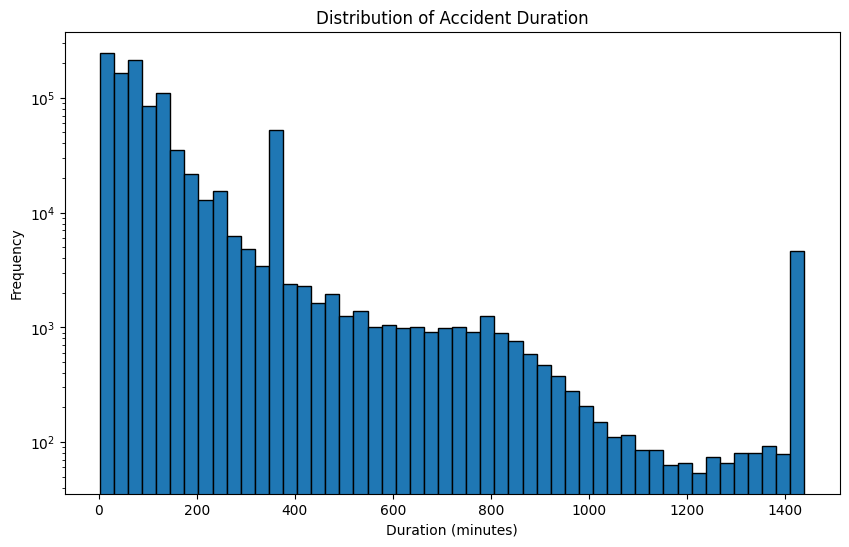

In [ ]:
# Calculate and display descriptive statistics for 'Duration_min'
print("Descriptive statistics for 'Duration_min':")
display(df_clean['Duration_min'].describe())

# Create a histogram for 'Duration_min'
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Duration_min'], bins=50, edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Accident Duration')
plt.yscale('log') # Use a logarithmic scale for the y-axis to better visualize lower frequencies
plt.show()

## Distance distribution


Descriptive statistics for 'Distance(mi)':


,Distance(mi)
count,1000000.000000
mean,0.560904
std,1.760586
min,0.000000
25%,0.000000
50%,0.030000
75%,0.464000
max,162.500000


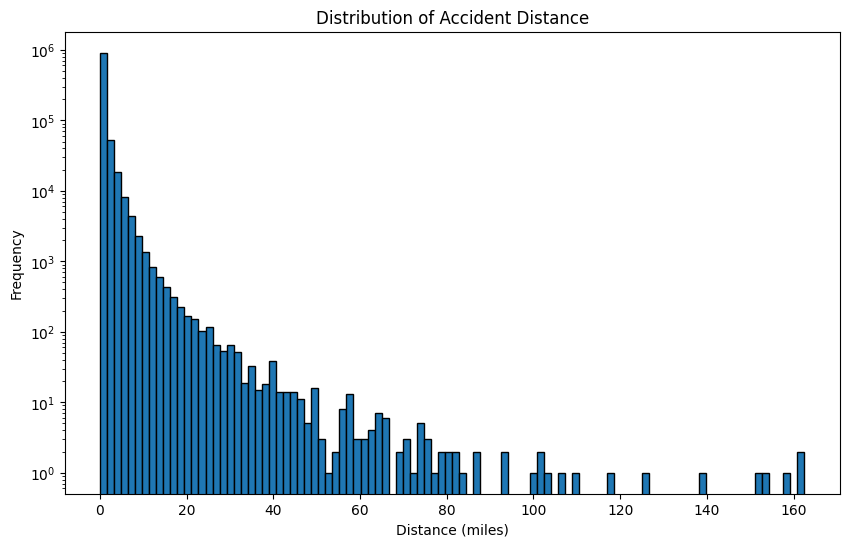

In [ ]:
# Calculate and display descriptive statistics for 'Distance(mi)'
print("Descriptive statistics for 'Distance(mi)':")
display(df_clean['Distance(mi)'].describe())

# Create a histogram for 'Distance(mi)'
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Distance(mi)'], bins=100, edgecolor='black') # Increased number of bins
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.title('Distribution of Accident Distance')
plt.yscale('log') # Use a logarithmic scale for the y-axis to improve visualization of lower frequencies
plt.show()

#### Weather conditions distribution


In [ ]:
weather_counts = df_clean['Weather_Condition'].value_counts()
weather_percentages = (weather_counts / len(df_clean)) * 100

print("Value counts for top 10 'Weather_Condition':")
display(weather_counts.head(10))

print("\nPercentage distribution for top 10 'Weather_Condition':")
display(weather_percentages.head(10).round(2))

Value counts for top 10 'Weather_Condition':


,count
Weather_Condition,
Fair,330601
Mostly Cloudy,131716
Cloudy,105504
Clear,104926
Partly Cloudy,90270
Overcast,49680
Light Rain,45995
Scattered Clouds,26444
Unknown,22796



Percentage distribution for top 10 'Weather_Condition':


,count
Weather_Condition,
Fair,33.06
Mostly Cloudy,13.17
Cloudy,10.55
Clear,10.49
Partly Cloudy,9.03
Overcast,4.97
Light Rain,4.60
Scattered Clouds,2.64
Unknown,2.28


## Temporal patterns


In [ ]:
df_clean['Hour'] = df_clean['Start_Time'].dt.hour
df_clean['Day_of_Week'] = df_clean['Start_Time'].dt.dayofweek  # Monday=0, Sunday=6
df_clean['Month'] = df_clean['Start_Time'].dt.month

hour_counts = df_clean['Hour'].value_counts().sort_index()
day_of_week_counts = df_clean['Day_of_Week'].value_counts().sort_index()
month_counts = df_clean['Month'].value_counts().sort_index()

print("Value counts for 'Hour':")
display(hour_counts)

print("\nValue counts for 'Day_of_Week':")
display(day_of_week_counts)

print("\nValue counts for 'Month':")
display(month_counts)

Value counts for 'Hour':


,count
Hour,
0,14484
1,12666
2,12044
3,10855
4,20706
5,29286
6,52653
7,75891
8,74760



Value counts for 'Day_of_Week':


,count
Day_of_Week,
0,156695
1,167293
2,169508
3,170114
4,177042
5,86596
6,72752



Value counts for 'Month':


,count
Month,
1,97922
2,84940
3,71366
4,76070
5,71859
6,73807
7,66424
8,77569
9,84212


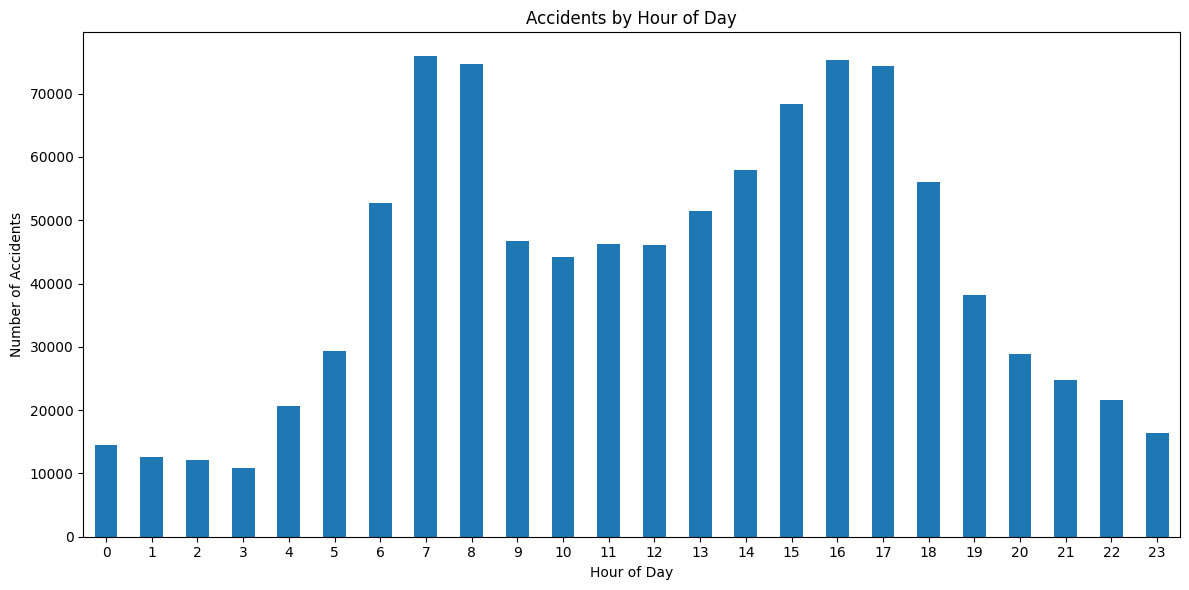

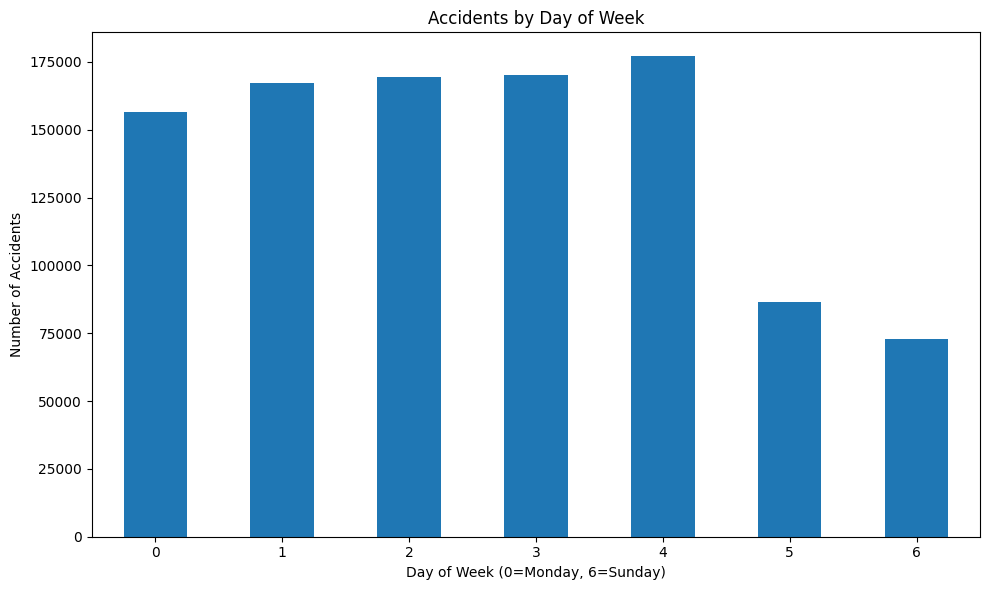

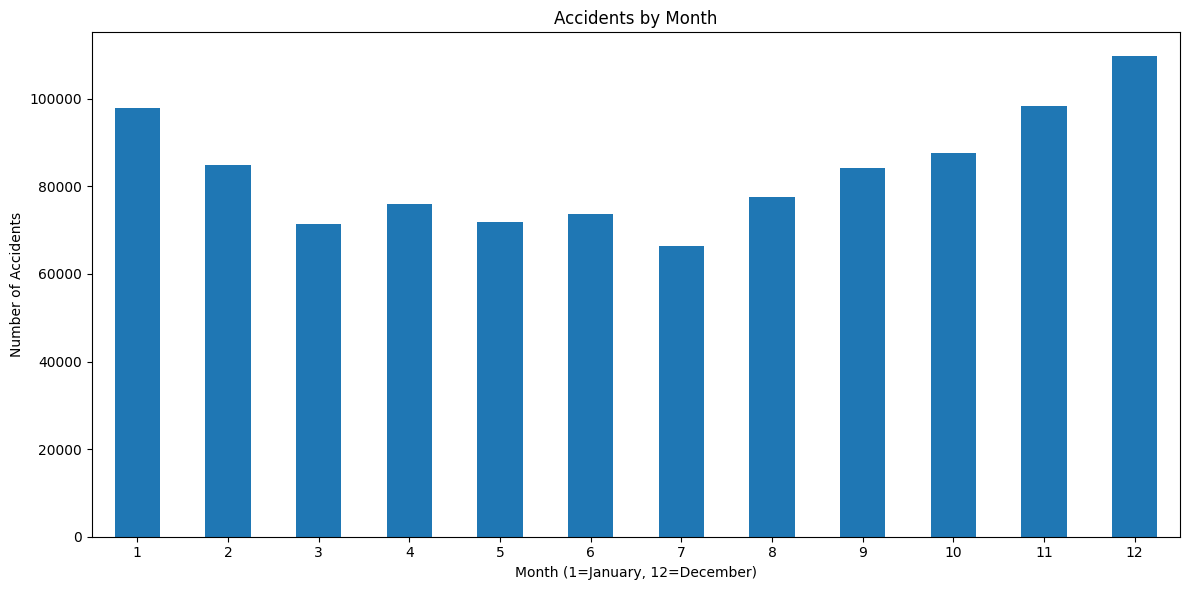

In [ ]:
# Plot accidents by Hour of Day
plt.figure(figsize=(12, 6))
hour_counts.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Hour of Day')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot accidents by Day of Week
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Day of Week')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot accidents by Month
plt.figure(figsize=(12, 6))
month_counts.plot(kind='bar')
plt.xlabel('Month (1=January, 12=December)')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Initialize df_clean_no_outliers with df_clean
df_clean_no_outliers = df_clean.copy()

# Remove outliers from 'Duration_min' using percentiles
lower_bound_duration = df_clean_no_outliers['Duration_min'].quantile(0.0005)
upper_bound_duration = df_clean_no_outliers['Duration_min'].quantile(0.9995)

df_clean_no_outliers = df_clean_no_outliers[(df_clean_no_outliers['Duration_min'] >= lower_bound_duration) & (df_clean_no_outliers['Duration_min'] <= upper_bound_duration)].copy()

print(f"Shape of data after removing duration outliers: {df_clean_no_outliers.shape}")

Shape of data after removing duration outliers: (999512, 39)


### Correlation Analysis

In [ ]:
# Select only numerical columns for correlation analysis
numerical_cols = df_clean_no_outliers.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = df_clean_no_outliers[numerical_cols].corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Duration_min,Hour,Day_of_Week,Month
Severity,1.000000,0.069713,0.051011,0.034372,-0.021830,-0.042736,0.021973,0.041219,-0.001697,0.036891,0.014684,-0.026659,0.011979,0.022397,-0.009038
Start_Lat,0.069713,1.000000,-0.065771,0.064090,-0.439684,-0.421635,0.022049,-0.191569,-0.086657,0.031688,-0.008474,-0.002743,-0.009890,0.016239,0.001966
Start_Lng,0.051011,-0.065771,1.000000,0.007509,-0.010887,-0.031114,0.176400,0.189619,-0.013615,0.078124,0.039374,-0.030914,-0.008446,-0.044803,0.010047
Distance(mi),0.034372,0.064090,0.007509,1.000000,-0.051546,-0.045062,0.007446,-0.092550,-0.035558,0.009711,0.007961,0.129692,0.000119,0.023276,0.006021
Temperature(F),-0.021830,-0.439684,-0.010887,-0.051546,1.000000,0.913594,-0.330261,0.109195,0.215884,0.034270,-0.008298,-0.014568,0.184921,-0.006174,0.132997
Wind_Chill(F),-0.042736,-0.421635,-0.031114,-0.045062,0.913594,1.000000,-0.271892,0.103961,0.202953,-0.034397,-0.003208,-0.010910,0.152210,-0.000116,0.124000
Humidity(%),0.021973,0.022049,0.176400,0.007446,-0.330261,-0.271892,1.000000,0.115398,-0.381857,-0.171699,0.143097,-0.007458,-0.275125,-0.018320,0.037372
Pressure(in),0.041219,-0.191569,0.189619,-0.092550,0.109195,0.103961,0.115398,1.000000,0.038279,-0.027118,-0.001762,-0.027384,-0.014947,-0.028067,-0.003467
Visibility(mi),-0.001697,-0.086657,-0.013615,-0.035558,0.215884,0.202953,-0.381857,0.038279,1.000000,0.014775,-0.211135,0.004558,0.089401,0.000797,0.022228
Wind_Speed(mph),0.036891,0.031688,0.078124,0.009711,0.034270,-0.034397,-0.171699,-0.027118,0.014775,1.000000,0.035737,-0.000493,0.130216,-0.004929,-0.087724


## Data Preprocessing And Split

#### Leakage Control & Feature Engineering

In [ ]:
# Drop 'End_Time' column for leakage control
if 'End_Time' in df_clean_no_outliers.columns:
    df_clean_no_outliers = df_clean_no_outliers.drop(columns=['End_Time'])
    print("Dropped 'End_Time' column from df_clean_no_outliers.")
else:
    print("'End_Time' column not found in df_clean_no_outliers.")

Dropped 'End_Time' column from df_clean_no_outliers.


In [ ]:
# Remove records with invalid durations (<0) and save to df_clean_no_outliers
df_clean_no_outliers = df_clean_no_outliers[df_clean_no_outliers["Duration_min"] > 0].copy()

print(f"Shape of data after removing non-positive durations: {df_clean_no_outliers.shape}")

Shape of data after removing non-positive durations: (999512, 38)


In [ ]:
# Select categorical columns
categorical_cols = df_clean.select_dtypes(include='object').columns

# Display the number of unique values for each categorical column
print("Number of unique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df_clean[col].nunique()}")

Number of unique values in categorical columns:
State: 49
Country: 1
Timezone: 5
Wind_Direction: 25
Weather_Condition: 119
Sunrise_Sunset: 3
Civil_Twilight: 3
Nautical_Twilight: 3
Astronomical_Twilight: 3


In [ ]:
from sklearn.model_selection import KFold
import category_encoders as ce

# Group 'Weather_Condition' into broader categories
def group_weather(condition):
    if isinstance(condition, str):
        condition = condition.lower()
        if 'clear' in condition or 'fair' in condition:
            return 'Clear'
        elif 'rain' in condition and 'snow' not in condition:
            return 'Rain'
        elif 'snow' in condition:
            return 'Snow'
        elif 'fog' in condition or 'mist' in condition:
            return 'Fog'
        elif 'storm' in condition or 'thunder' in condition:
            return 'Storm'
        else:
            return 'Other/Cloudy'
    return 'Unknown' # Handle potential non-string or missing values

# Start from df_clean_no_outliers
df_clean_encoded = df_clean_no_outliers.copy()

# Feature Engineering from Start_Time
df_clean_encoded['Hour'] = df_clean_encoded['Start_Time'].dt.hour
df_clean_encoded['Day_of_Week'] = df_clean_encoded['Start_Time'].dt.dayofweek  # Monday=0, Sunday=6
df_clean_encoded['Month'] = df_clean_encoded['Start_Time'].dt.month

# Cyclic Encoding for Hour
df_clean_encoded['Hour_sin'] = np.sin(2 * np.pi * df_clean_encoded['Hour'] / 24)
df_clean_encoded['Hour_cos'] = np.cos(2 * np.pi * df_clean_encoded['Hour'] / 24)

# Is_Weekend feature
df_clean_encoded['Is_Weekend'] = df_clean_encoded['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

# Drop the original time columns after feature engineering
df_clean_encoded = df_clean_encoded.drop(columns=['Start_Time', 'Hour', 'Day_of_Week'])


df_clean_encoded['Weather_Category'] = df_clean_encoded['Weather_Condition'].apply(group_weather)

# One-Hot Encoding for Weather_Category and other categorical features (keeping Sunrise_Sunset for binary encoding in next cell)
categorical_cols_ohe = ['State', 'Country', 'Timezone', 'Wind_Direction', 'Civil_Twilight', 'Sunrise_Sunset','Nautical_Twilight', 'Astronomical_Twilight', 'Weather_Category']
df_clean_encoded = pd.get_dummies(df_clean_encoded, columns=categorical_cols_ohe, dummy_na=False)

# Drop the original 'Weather_Condition' column
df_clean_encoded = df_clean_encoded.drop(columns=['Weather_Condition'])

print("Shape of data after encoding and feature engineering (keeping Sunrise_Sunset one-hot encoded):", df_clean_encoded.shape)
display(df_clean_encoded.head())

Shape of data after encoding and feature engineering (keeping Sunrise_Sunset one-hot encoded): (999512, 127)


,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Duration_min,Month,Hour_sin,Hour_cos,Is_Weekend,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Country_US,Timezone_US/Central,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific,Timezone_Unknown,Wind_Direction_CALM,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_Unknown,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Civil_Twilight_Day,Civil_Twilight_Night,Civil_Twilight_Unknown,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Sunrise_Sunset_Unknown,Nautical_Twilight_Day,Nautical_Twilight_Night,Nautical_Twilight_Unknown,Astronomical_Twilight_Day,Astronomical_Twilight_Night,Astronomical_Twilight_Unknown,Weather_Category_Clear,Weather_Category_Fog,Weather_Category_Other/Cloudy,Weather_Category_Rain,Weather_Category_Snow,Weather_Category_Storm
0,2,44.987784,-117.895987,0.474,29.0,24.0,72.0,26.51,10.0,5.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,519.416667,4,0.500000,0.866025,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False
1,2,40.768687,-73.882166,0.357,77.0,77.0,58.0,29.85,10.0,15.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,135.733333,5,-0.866025,0.500000,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False
2,3,29.438782,-98.477440,0.000,97.0,97.0,32.0,29.07,10.0,7.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,89.983333,8,-0.965926,-0.258819,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,F

In [ ]:
# Convert boolean columns to integers (0 or 1)
bool_cols = df_clean_encoded.select_dtypes(include='bool').columns
for col in bool_cols:
    df_clean_encoded[col] = df_clean_encoded[col].astype(int)

print("Boolean columns converted to integers.")
display(df_clean_encoded[bool_cols].head())
print("\nData types after converting boolean columns:")
display(df_clean_encoded.info())

Boolean columns converted to integers.


,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Country_US,Timezone_US/Central,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific,Timezone_Unknown,Wind_Direction_CALM,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_Unknown,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Civil_Twilight_Day,Civil_Twilight_Night,Civil_Twilight_Unknown,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Sunrise_Sunset_Unknown,Nautical_Twilight_Day,Nautical_Twilight_Night,Nautical_Twilight_Unknown,Astronomical_Twilight_Day,Astronomical_Twilight_Night,Astronomical_Twilight_Unknown,Weather_Category_Clear,Weather_Category_Fog,Weather_Category_Other/Cloudy,Weather_Category_Rain,Weather_Category_Snow,Weather_Category_Storm
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0



Data types after converting boolean columns:
<class 'pandas.core.frame.DataFrame'>
Index: 999512 entries, 0 to 999999
Columns: 127 entries, Severity to Weather_Category_Storm
dtypes: float64(13), int32(1), int64(113)
memory usage: 972.3 MB


None

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the continuous weather columns to standardize
weather_cols_to_standardize = [
    "Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)",
    "Wind_Speed(mph)", "Precipitation(in)" # Removed Wind_Chill(F)
]

# Drop the highly correlated 'Wind_Chill(F)' column - This should ideally be done earlier, but keeping here for consistency with previous steps
if 'Wind_Chill(F)' in df_clean_encoded.columns:
    df_clean_encoded = df_clean_encoded.drop(columns=['Wind_Chill(F)'])
    print("Dropped 'Wind_Chill(F)' column due to high correlation with Temperature(F).")
else:
    print("'Wind_Chill(F)' column not found in the DataFrame.")

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the selected columns
# It's recommended to fit the scaler on the training data ONLY and then transform both train and test sets.
# For demonstration, applying to the whole dataframe here.
df_clean_scaled = df_clean_encoded.copy()
df_clean_scaled[weather_cols_to_standardize] = scaler.fit_transform(df_clean_scaled[weather_cols_to_standardize])

print("Data after standardizing weather metrics:")
display(df_clean_scaled[weather_cols_to_standardize].head())

Dropped 'Wind_Chill(F)' column due to high correlation with Temperature(F).
Data after standardizing weather metrics:


,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,-1.738942,0.315596,-3.027633,0.334894,-0.516357,-0.125896
1,0.812997,-0.305060,0.304419,0.334894,1.444312,-0.125896
2,1.876305,-1.457707,-0.473725,0.334894,-0.124223,-0.125896
3,0.600336,-1.147379,0.015110,0.334894,1.836445,-0.125896
4,0.600336,0.359928,0.633634,0.334894,-1.496691,-0.125896


In [ ]:
df_clean_scaled.shape
display(df_clean_scaled.info())

<class 'pandas.core.frame.DataFrame'>
Index: 999512 entries, 0 to 999999
Columns: 126 entries, Severity to Weather_Category_Storm
dtypes: float64(12), int32(1), int64(113)
memory usage: 964.6 MB


None

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Assuming 'Duration_min' is the target variable as clarified before
# and 'Severity' is used for stratification.
X = df_clean_scaled.drop(columns=['Duration_min']) # Drop target and time columns
y = df_clean_scaled['Duration_min']

# Stratify by 'Severity'
stratify_col = df_clean_scaled['Severity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # 30% for testing
    random_state=42,  # Fixed random state for reproducibility
    stratify=stratify_col # Stratify by Severity
)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nDtype of X_train:", X_train.dtypes.unique())
print("Dtype of y_train:", y_train.dtypes)

Shape of X_train: (799609, 125)
Shape of X_test: (199903, 125)
Shape of y_train: (799609,)
Shape of y_test: (199903,)

Dtype of X_train: [dtype('int64') dtype('float64') dtype('int32')]
Dtype of y_train: float64


## Decision Tree Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Create a DecisionTreeRegressor object
dt_regressor = DecisionTreeRegressor(random_state=42) # Added random_state for reproducibility

# Define the pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('decision_tree_regressor', dt_regressor)
])

print("Pipeline created successfully:")
print(pipeline)

In [ ]:
from sklearn.model_selection import ShuffleSplit # Changed from StratifiedShuffleSplit

# Define a coarse hyperparameter grid as requested
param_grid = {
    'decision_tree_regressor__max_depth': [6, 10, 14, 18], # Capped at <=18 for large dataset
    'decision_tree_regressor__min_samples_leaf': [100, 200, 400], # Set >=100 for >=1M rows
    'decision_tree_regressor__min_samples_split': [100, 200, 400],
    'decision_tree_regressor__max_features': ["sqrt", "log2", 0.5],
    'decision_tree_regressor__ccp_alpha': [0.0, 1e-4, 5e-4, 1e-3] # For pruning
}

# Instantiate ShuffleSplit with a fixed number of evaluations as requested
cv_strategy = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42) # Changed from StratifiedShuffleSplit

print("Coarse hyperparameter grid and ShuffleSplit cross-validation strategy defined.")

##  Hyperparameter tuning


In [ ]:
%load_ext memory_profiler

import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, make_scorer
import warnings

# Ignore warnings that might arise from specific hyperparameter combinations
warnings.filterwarnings('ignore')

# Define the scoring metric for tuning..
scoring_metric = 'neg_mean_absolute_error'

# Set a time budget for fitting a single model instance during tuning (e.g., 30 seconds)
TIME_BUDGET_PER_FIT = 30

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=10,
    scoring=scoring_metric,
    cv=cv_strategy,
    random_state=42,
    n_jobs=-1,
    return_train_score=True # To get training scores for analysis if needed
)

print(f"Starting RandomizedSearchCV with {random_search.n_iter} iterations...")

start_time = time.time()
# Fit RandomizedSearchCV and measure peak memory usage
%memit random_search.fit(X_train, y_train)
end_time = time.time()

print("\nRandomizedSearchCV completed.")
print(f"Total tuning runtime: {end_time - start_time:.2f} seconds")

# Get the best hyperparameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("\nBest Hyperparameters found:")
display(best_params)

print(f"\nBest cross-validation score (negative MAE): {best_score:.4f}")
print(f"Corresponding MAE: {-best_score:.4f}")


In [ ]:
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# Train the final model with the best hyperparameters
cleaned_best_params = {key.replace('decision_tree_regressor__', ''): value for key, value in best_params.items()}

best_dt_regressor = DecisionTreeRegressor(random_state=42, **cleaned_best_params)

# Create a pipeline for the final model (including scaler if used)
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('decision_tree_regressor', best_dt_regressor)
])

print("Training the final model with best hyperparameters...")
start_time_train = time.time()
# Measure training time and peak memory usage
%memit final_pipeline.fit(X_train, y_train)
end_time_train = time.time()
print(f"Final model training time: {end_time_train - start_time_train:.2f} seconds")

print("\nFinal model trained successfully.")

## DT Regression Model Performance

In [ ]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = final_pipeline.predict(X_test)

# Calculate the regression metrics
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE) on Test Set: {mae:.4f}")
print(f"Median Absolute Error (MedAE) on Test Set: {medae:.4f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse:.4f}")

In [ ]:
# Access the trained Decision Tree Regressor model from the pipeline
trained_dt_model = final_pipeline.named_steps['decision_tree_regressor']

# Get tree characteristics
tree_depth = trained_dt_model.get_depth()
n_leaves = trained_dt_model.get_n_leaves()
# Note: Calculating total node count directly from the tree object is not straightforward.
# A common way is to use the tree structure attributes, but it's more complex.
# We can report depth and leaves as primary structural characteristics.
# If a full node count is critical, a recursive function traversing the tree structure would be needed.
# For now, let's report depth and leaves.
print(f"Final Tree Depth: {tree_depth}")
print(f"Number of Leaves: {n_leaves}")

# Get feature importances
feature_importances = trained_dt_model.feature_importances_

# Create a pandas Series for easier sorting and selection
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Get the top 10 most important features
top_10_features = feature_importance_series.nlargest(10)

print("\nTop 10 Feature Importances:")
display(top_10_features)

# Optional: Plot feature importances
plt.figure(figsize=(10, 6))
top_10_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

### Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error, make_scorer # Import make_scorer
from sklearn.model_selection import ShuffleSplit # Import ShuffleSplit


# Define the scoring metric for the learning curve (using the negative of the evaluation metric)
learning_curve_scoring = make_scorer(mean_absolute_error, greater_is_better=False)


# Define training set sizes to use for the learning curve
train_sizes = np.linspace(0.1, 1.0, 5) # Use 5 different training set sizes from 10% to 100%

print("Generating learning curve...")
# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=final_pipeline, # Use the trained final pipeline
    X=X_train, # Use the training data
    y=y_train, # Use the training labels
    train_sizes=train_sizes,
    scoring=learning_curve_scoring,
    cv=cv_strategy,
    n_jobs=-1, # Use all available cores
    random_state=42
)

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score (Negative MAE)")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score (Negative MAE)")

plt.xlabel("Training Set Size")
plt.ylabel("Score (Negative MAE)")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

print("Learning curve generated.")

## Generate Pruning Path Figure

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Define the hyperparameter to tune and the range of values to explore
param_name = "decision_tree_regressor__max_depth"
# Use the values from the defined param_grid for max_depth
param_range = param_grid[param_name]


# Define the scoring metric (using the negative of the evaluation metric)
learning_curve_scoring = make_scorer(mean_absolute_error, greater_is_better=False)


print(f"Generating validation curve for '{param_name}'...")
# Generate the validation curve data
train_scores, test_scores = validation_curve(
    estimator=final_pipeline, # Use the trained final pipeline structure
    X=X_train, # Use the training data
    y=y_train, # Use the training labels
    param_name=param_name,
    param_range=param_range,
    cv=cv_strategy,
    scoring=learning_curve_scoring,
    n_jobs=-1 # Use all available cores
)

# Calculate the mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with Decision Tree Regressor")
plt.xlabel(param_name.replace('decision_tree_regressor__', ''))
plt.ylabel("Score (Negative MAE)")
plt.ylim(test_scores_mean.min() - 5, train_scores_mean.max() + 5) # Adjust y-limit for better visualization
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()

print("Validation curve generated.")

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Define the hyperparameter to tune (ccp_alpha) and the range of values to explore
param_name = "decision_tree_regressor__ccp_alpha"
# Use the values from the defined param_grid for ccp_alpha
param_range = param_grid[param_name]


# Define the scoring metric (using the negative of the evaluation metric)
scoring_metric = make_scorer(mean_absolute_error, greater_is_better=False)


print(f"Generating pruning path data for '{param_name}'...")
# Generate the validation curve data for ccp_alpha
train_scores_alpha, test_scores_alpha = validation_curve(
    estimator=final_pipeline, # Use the trained final pipeline structure
    X=X_train, # Use the training data
    y=y_train, # Use the training labels
    param_name=param_name,
    param_range=param_range,
    cv=cv_strategy,
    scoring=scoring_metric,
    n_jobs=-1
)

# Calculate the mean test scores for each ccp_alpha
test_scores_mean_alpha = np.mean(test_scores_alpha, axis=1)

# Plot ccp_alpha vs. validation score
plt.figure(figsize=(10, 6))
plt.title("Pruning Path (ccp_alpha vs. Validation Score)")
plt.xlabel("ccp_alpha")
plt.ylabel("Score (Negative MAE)")
# plt.ylim(test_scores_mean_alpha.min() - 5, test_scores_mean_alpha.max() + 5) # Adjust y-limit
lw = 2
plt.plot(param_range, test_scores_mean_alpha, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, np.mean(test_scores_alpha, axis=1) - np.std(test_scores_alpha, axis=1),
                 np.mean(test_scores_alpha, axis=1) + np.std(test_scores_alpha, axis=1), alpha=0.2,
                 color="navy", lw=lw)

plt.legend(loc="best")
plt.grid()
plt.xscale('log') # Use log scale for ccp_alpha
plt.show()

print("Pruning path figure (ccp_alpha vs. validation score) generated.")

## SVM

### Data subsampling and Scaling


In [ ]:
# Determine the target sample size
target_sample_size = 20000

# Calculate the fraction needed to get the target sample size
current_total_size = df_clean_scaled.shape[0]
test_size_fraction = target_sample_size / current_total_size

# Create a stratified subsample
_, df_subsample, _, y_subsample = train_test_split(
    df_clean_scaled.drop(columns=['Duration_min']), # Features
    df_clean_scaled['Duration_min'], # Target
    test_size=test_size_fraction,
    random_state=42,
    stratify=df_clean_scaled['Severity'] # Stratify by Severity from the scaled dataframe
)

# Add the target variable back to the subsample DataFrame for convenience in later steps
df_subsample['Duration_min'] = y_subsample

# Print the shape of the subsample
print("Shape of the stratified subsample:", df_subsample.shape)

# Display the value counts of Severity in the subsample to verify stratification
print("\nSeverity distribution in the subsample:")
display(df_subsample['Severity'].value_counts(normalize=True).sort_index())
print("\nSeverity distribution in the original data:")
display(df_clean_scaled['Severity'].value_counts(normalize=True).sort_index())

print(f"\nRationale for subsampling: Reduced sample size to {target_sample_size} rows to decrease training time and memory usage for computationally intensive SVR models, making tuning feasible. Stratification ensures the distribution of 'Severity' is maintained in the smaller sample.")

Shape of the stratified subsample: (20000, 126)

Severity distribution in the subsample:


,proportion
Severity,
1,0.00875
2,0.79600
3,0.16890
4,0.02635



Severity distribution in the original data:


,proportion
Severity,
1,0.008754
2,0.795998
3,0.168876
4,0.026371



Rationale for subsampling: Reduced sample size to 20000 rows to decrease training time and memory usage for computationally intensive SVR models, making tuning feasible. Stratification ensures the distribution of 'Severity' is maintained in the smaller sample.


In [ ]:
from sklearn.preprocessing import StandardScaler

# The target variable is 'Duration_min'.
X_subsample = df_subsample.drop(columns=['Duration_min'])
y_subsample = df_subsample['Duration_min']

# Identify the continuous numerical columns to be standardized.
weather_cols_to_standardize = [
    "Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)",
    "Wind_Speed(mph)", "Precipitation(in)"
]

# Ensure these columns exist in the subsample features
weather_cols_in_subsample = [col for col in weather_cols_to_standardize if col in X_subsample.columns]

# Initialize a StandardScaler object.
scaler_subsample = StandardScaler()

# Apply the scaler to the identified continuous numerical columns in X_subsample using fit_transform.
X_subsample[weather_cols_in_subsample] = scaler_subsample.fit_transform(X_subsample[weather_cols_in_subsample])

# Verify the data types and check for any remaining missing values in the preprocessed X_subsample and y_subsample.
print("Data types in X_subsample after preprocessing:")
display(X_subsample.dtypes.unique())

print("\nMissing values in X_subsample after preprocessing:")
display(X_subsample.isnull().sum().sum())

print("\nMissing values in y_subsample after preprocessing:")
display(y_subsample.isnull().sum().sum())

print("\nShape of X_subsample after preprocessing:", X_subsample.shape)
print("Shape of y_subsample after preprocessing:", y_subsample.shape)

display(X_subsample.head())

Data types in X_subsample after preprocessing:


array([dtype('int64'), dtype('float64'), dtype('int32')], dtype=object)


Missing values in X_subsample after preprocessing:


np.int64(0)


Missing values in y_subsample after preprocessing:


np.int64(0)


Shape of X_subsample after preprocessing: (20000, 125)
Shape of y_subsample after preprocessing: (20000,)


,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Month,Hour_sin,Hour_cos,Is_Weekend,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Country_US,Timezone_US/Central,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific,Timezone_Unknown,Wind_Direction_CALM,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_Unknown,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Civil_Twilight_Day,Civil_Twilight_Night,Civil_Twilight_Unknown,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Sunrise_Sunset_Unknown,Nautical_Twilight_Day,Nautical_Twilight_Night,Nautical_Twilight_Unknown,Astronomical_Twilight_Day,Astronomical_Twilight_Night,Astronomical_Twilight_Unknown,Weather_Category_Clear,Weather_Category_Fog,Weather_Category_Other/Cloudy,Weather_Category_Rain,Weather_Category_Snow,Weather_Category_Storm
905470,4,37.444299,-79.119890,0.860,-1.111205,1.566969,0.542588,0.338333,-0.127653,-0.124489,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0.965926,0.258819,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
236494,2,33.150700,-87.546349,0.000,-0.578735,-0.381920,0.542588,0.338333,-1.507904,-0.124489,0,0,0,0,0,0,0,0,0,0,0,1,0,11,-0.965926,-0.258819,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0
35777,3,37.845757,-122.298286,0.000,0.273217,-0.160456,0.429835,0.338333,1.252599,-0.124489,0,0,0,0,0,0,0,0,0,0,0,0,0,7,-0.707107,-0.707107,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
284280,2,38.673156,-121.628013,0.120,2.243357,-2.242224,0.101827,0.338333,-0.916368,-0.124489,0,0,0,0,0,0,0,0,0,0,0,0,0,6,-0.258819,-0.965926,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
487373,2,42.331385,-122.870272,0.904,-0.259253,1.079747,-1.005200,0.338333,-1.507904,-0.124489,0,0,0,0,0,0,0,0,1,0,0,0,0,8,0.866025,-0.500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0


### Define SVM models and pipelines


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Define the pipeline for the RBF kernel SVR model
svr_rbf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Include StandardScaler as the first step
    ('svr', SVR(kernel='rbf')) # SVR with RBF kernel
])

# Define the pipeline for the Linear kernel SVR model
svr_linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Include StandardScaler as the first step
    ('svr', SVR(kernel='linear')) # SVR with Linear kernel
])

# Print both pipelines to confirm their structure
print("SVR Pipeline with RBF Kernel:")
display(svr_rbf_pipeline)

print("\nSVR Pipeline with Linear Kernel:")
display(svr_linear_pipeline)

SVR Pipeline with RBF Kernel:


Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())])


SVR Pipeline with Linear Kernel:


Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(kernel='linear'))])

### Hyperparameter Tuning Setup

In [ ]:
from sklearn.model_selection import ShuffleSplit

# Determine the number of features for gamma calculation (1/d, 2/d)
# Use the subsampled data features (X_subsample) to get the number of features
n_features = X_subsample.shape[1]
print(f"Number of features (d): {n_features}")

# Define the coarse hyperparameter grid for RBF kernel SVR
param_grid_rbf = {
    # Search C ∈ [10e−3, 10e+3] on a log scale
    'svr__C': np.logspace(-3, 3, 7), # Example: 7 points from 10^-3 to 10^3 on a log scale
    # Search γ ∈ [10e−4, 10] on a log scale
    'svr__gamma': np.logspace(-4, 1, 6), # Example: 6 points from 10^-4 to 10^1 on a log scale
}

# Define the coarse hyperparameter grid for Linear kernel SVR
param_grid_linear = {
    'svr__C': [0.5, 2, 8] # Example coarse grid for C for Linear kernel
}

# Define the cross-validation strategy
# Using ShuffleSplit as it's suitable for regression and large datasets
# Using a fixed number of evaluations (e.g., 3 splits)
cv_strategy_svm = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

print("\nHyperparameter grids defined:")
print("RBF Grid:")
display(param_grid_rbf)
print("\nLinear Grid:")
display(param_grid_linear)

print("\nCross-validation strategy defined:")
display(cv_strategy_svm)

Number of features (d): 125

Hyperparameter grids defined:
RBF Grid:


{'svr__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'svr__gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])}


Linear Grid:


{'svr__C': [0.5, 2, 8]}


Cross-validation strategy defined:


ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None)

### Perform Hyperparameter Tuning for RBF SVR

In [ ]:
# Load the memory_profiler extension
%load_ext memory_profiler

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time
import warnings
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import ShuffleSplit


warnings.filterwarnings('ignore')

# Define the scoring metric for tuning (using negative MAE)
scoring_metric_svm = make_scorer(mean_absolute_error, greater_is_better=False)

# --- Tuning for RBF Kernel SVR ---
print("Starting Hyperparameter Tuning for RBF Kernel SVR...")

# Initialize RandomizedSearchCV for RBF Kernel
random_search_rbf = RandomizedSearchCV(
    estimator=svr_rbf_pipeline,
    param_distributions=param_grid_rbf,
    n_iter=10,
    scoring=scoring_metric_svm,
    cv=cv_strategy_svm,
    random_state=42,
    n_jobs=-1, # Use all available cores
    return_train_score=True
)

start_time_tune_rbf = time.time()
# Perform tuning for RBF Kernel
%memit random_search_rbf.fit(X_subsample, y_subsample)
end_time_tune_rbf = time.time()

print("\nRBF Kernel SVR Hyperparameter Tuning Completed.")
print(f"RBF Tuning Runtime: {end_time_tune_rbf - start_time_tune_rbf:.2f} seconds")

best_params_rbf = random_search_rbf.best_params_
best_score_rbf = random_search_rbf.best_score_

print("\nBest Hyperparameters for RBF Kernel:")
display(best_params_rbf)
print(f"\nBest cross-validation score (negative MAE) for RBF: {best_score_rbf:.4f}")
print(f"Corresponding MAE for RBF: {-best_score_rbf:.4f}")


# Tuning for Linear Kernel SVR
print("\nStarting Hyperparameter Tuning for Linear Kernel SVR...")

# Initialize RandomizedSearchCV for Linear Kernel
random_search_linear = RandomizedSearchCV(
    estimator=svr_linear_pipeline,
    param_distributions=param_grid_linear,
    n_iter=len(list(GridSearchCV(svr_linear_pipeline, param_grid_linear).param_grid.values())[0]), # Number of iterations = number of C values
    scoring=scoring_metric_svm,
    cv=cv_strategy_svm,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

start_time_tune_linear = time.time()
# Perform tuning for Linear Kernel
%memit random_search_linear.fit(X_subsample, y_subsample)
end_time_tune_linear = time.time()

print("\nLinear Kernel SVR Hyperparameter Tuning Completed.")
print(f"Linear Tuning Runtime: {end_time_tune_linear - start_time_tune_linear:.2f} seconds")

best_params_linear = random_search_linear.best_params_
best_score_linear = random_search_linear.best_score_ # Negative MAE

print("\nBest Hyperparameters for Linear Kernel:")
display(best_params_linear)
print(f"\nBest cross-validation score (negative MAE) for Linear: {best_score_linear:.4f}")
print(f"Corresponding MAE for Linear: {-best_score_linear:.4f}")

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Starting Hyperparameter Tuning for RBF Kernel SVR...
peak memory: 5971.88 MiB, increment: 16.35 MiB

RBF Kernel SVR Hyperparameter Tuning Completed.
RBF Tuning Runtime: 583.81 seconds

Best Hyperparameters for RBF Kernel:


{'svr__gamma': np.float64(0.01), 'svr__C': np.float64(10.0)}


Best cross-validation score (negative MAE) for RBF: -68.1555
Corresponding MAE for RBF: 68.1555

Starting Hyperparameter Tuning for Linear Kernel SVR...
peak memory: 5972.88 MiB, increment: 0.93 MiB

Linear Kernel SVR Hyperparameter Tuning Completed.
Linear Tuning Runtime: 177.69 seconds

Best Hyperparameters for Linear Kernel:


{'svr__C': 0.5}


Best cross-validation score (negative MAE) for Linear: -68.6791
Corresponding MAE for Linear: 68.6791


## Train the Final SVM Models

In [ ]:
# Train the final RBF Kernel SVR model with the best hyperparameters
cleaned_best_params_rbf = {key.replace('svr__', ''): value for key, value in best_params_rbf.items()}

best_svr_rbf = SVR(kernel='rbf', **cleaned_best_params_rbf)

# Create a pipeline for the final RBF model (including scaler if used)
final_svr_rbf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', best_svr_rbf)
])

print("Training the final RBF Kernel SVR model...")
start_time_train_rbf = time.time()
# Measure training time and peak memory usage for RBF model
%memit final_svr_rbf_pipeline.fit(X_subsample, y_subsample)
end_time_train_rbf = time.time()
print(f"Final RBF model training time: {end_time_train_rbf - start_time_train_rbf:.2f} seconds")

print("\nFinal RBF Kernel SVR model trained successfully.")


# Train the final Linear Kernel SVR model with the best hyperparameters
cleaned_best_params_linear = {key.replace('svr__', ''): value for key, value in best_params_linear.items()}

best_svr_linear = SVR(kernel='linear', **cleaned_best_params_linear)

# Create a pipeline for the final Linear model (including scaler if used)
final_svr_linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', best_svr_linear)
])

print("\nTraining the final Linear Kernel SVR model...")
start_time_train_linear = time.time()
%memit final_svr_linear_pipeline.fit(X_subsample, y_subsample)
end_time_train_linear = time.time()
print(f"Final Linear model training time: {end_time_train_linear - start_time_train_linear:.2f} seconds")

print("\nFinal Linear Kernel SVR model trained successfully.")

Training the final RBF Kernel SVR model...
peak memory: 5972.84 MiB, increment: 0.00 MiB
Final RBF model training time: 42.04 seconds

Final RBF Kernel SVR model trained successfully.

Training the final Linear Kernel SVR model...
peak memory: 5972.85 MiB, increment: 0.00 MiB
Final Linear model training time: 39.59 seconds

Final Linear Kernel SVR model trained successfully.


## Evaluate the Final SVM Models

In [ ]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error

# Define features (X_subsample_test) and target (y_subsample_test) for evaluation
# Need to split the df_subsample into train and test sets for evaluation purposes
# Using a similar split ratio as the main dataset split (e.g., 80/20 or 70/30)
# Need to ensure consistent splitting with how X_subsample and y_subsample were created.

# Re-splitting the subsample to get a test set.
# Assuming the subsample was created from the original df_clean_scaled train set,
# we now need to split this subsample into its own train/test for evaluation.
# A common practice is to split the subsample itself into training and testing portions
# for evaluating models trained *on that subsample*.

# Let's split the subsample into training and testing sets (e.g., 80/20 split)
# Stratify by 'Severity' if it's still in df_subsample and relevant for the subsample split
if 'Severity' in df_subsample.columns:
    stratify_subsample = df_subsample['Severity']
else:
    stratify_subsample = None # Cannot stratify if Severity is not available


X_subsample_train, X_subsample_test, y_subsample_train, y_subsample_test = train_test_split(
    df_subsample.drop(columns=['Duration_min']),
    df_subsample['Duration_min'],
    test_size=0.2, # Example test size for subsample evaluation
    random_state=42,
    stratify=stratify_subsample
)

# --- Evaluate RBF Kernel SVR ---
print("Evaluating RBF Kernel SVR Model...")
y_pred_rbf = final_svr_rbf_pipeline.predict(X_subsample_test)

mae_rbf = mean_absolute_error(y_subsample_test, y_pred_rbf)
medae_rbf = median_absolute_error(y_subsample_test, y_pred_rbf)
mse_rbf = mean_squared_error(y_subsample_test, y_pred_rbf)

print(f"RBF SVR MAE on Subsample Test Set: {mae_rbf:.4f}")
print(f"RBF SVR Median AE on Subsample Test Set: {medae_rbf:.4f}")
print(f"RBF SVR MSE on Subsample Test Set: {mse_rbf:.4f}")


# --- Evaluate Linear Kernel SVR ---
print("\nEvaluating Linear Kernel SVR Model...")
y_pred_linear = final_svr_linear_pipeline.predict(X_subsample_test)

mae_linear = mean_absolute_error(y_subsample_test, y_pred_linear)
medae_linear = median_absolute_error(y_subsample_test, y_pred_linear)
mse_linear = mean_squared_error(y_subsample_test, y_pred_linear)

print(f"Linear SVR MAE on Subsample Test Set: {mae_linear:.4f}")
print(f"Linear SVR Median AE on Subsample Test Set: {medae_linear:.4f}")
print(f"Linear SVR MSE on Subsample Test Set: {mse_linear:.4f}")

Evaluating RBF Kernel SVR Model...
RBF SVR MAE on Subsample Test Set: 64.4314
RBF SVR Median AE on Subsample Test Set: 26.0865
RBF SVR MSE on Subsample Test Set: 24607.5853

Evaluating Linear Kernel SVR Model...
Linear SVR MAE on Subsample Test Set: 67.4753
Linear SVR Median AE on Subsample Test Set: 29.0408
Linear SVR MSE on Subsample Test Set: 25112.7338


## Generate Learning Curves for SVM Models

Generating learning curve for RBF Kernel SVR...


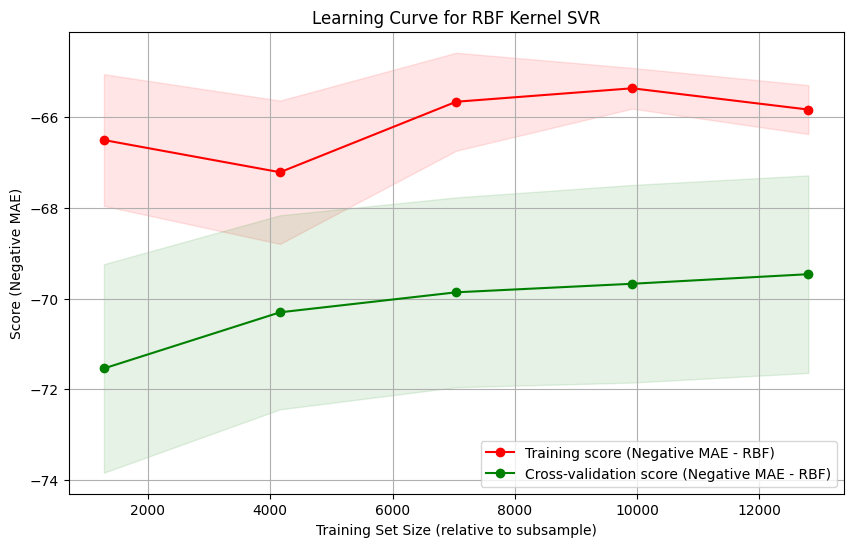


Generating learning curve for Linear Kernel SVR...


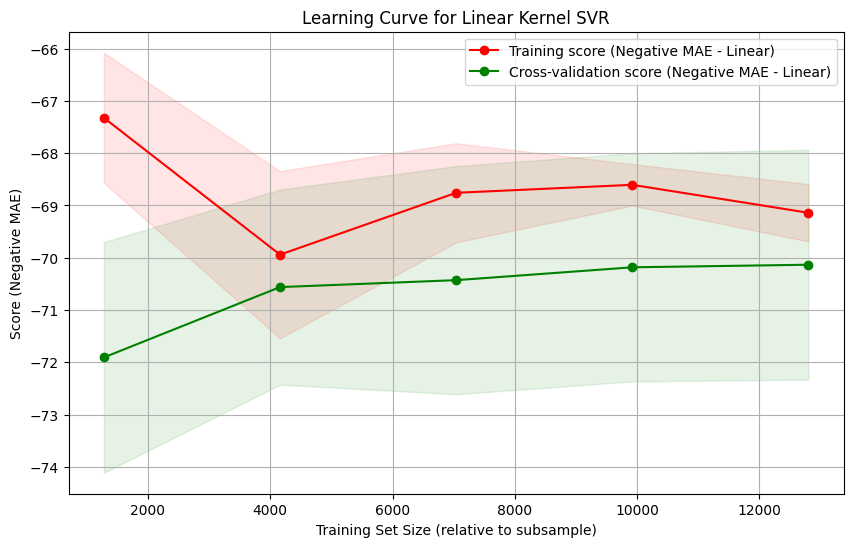

Learning curves for SVM models generated.


In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error, make_scorer

# Define the scoring metric for the learning curve (negative MAE)
learning_curve_scoring_svm = make_scorer(mean_absolute_error, greater_is_better=False)

# Define training set sizes to use for the learning curve (relative to subsample size)
train_sizes_subsample = np.linspace(0.1, 1.0, 5) # 5 points from 10% to 100% of subsample

print("Generating learning curve for RBF Kernel SVR...")
# Generate the learning curve data for RBF Kernel SVR
train_sizes_rbf, train_scores_rbf, test_scores_rbf = learning_curve(
    estimator=final_svr_rbf_pipeline, # Use the trained final RBF pipeline
    X=X_subsample_train, # Use the subsampled training data
    y=y_subsample_train, # Use the subsampled training labels
    train_sizes=train_sizes_subsample,
    scoring=learning_curve_scoring_svm,
    cv=ShuffleSplit(n_splits=3, test_size=0.2, random_state=42), # Use ShuffleSplit for CV on subsample
    n_jobs=-1, # Use all available cores
    random_state=42
)

# Calculate the mean and standard deviation for RBF scores
train_scores_mean_rbf = np.mean(train_scores_rbf, axis=1)
train_scores_std_rbf = np.std(train_scores_rbf, axis=1)
test_scores_mean_rbf = np.mean(test_scores_rbf, axis=1)
test_scores_std_rbf = np.std(test_scores_rbf, axis=1)

# Plot the learning curve for RBF Kernel SVR
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_rbf, train_scores_mean_rbf - train_scores_std_rbf,
                 train_scores_mean_rbf + train_scores_std_rbf, alpha=0.1, color="r")
plt.fill_between(train_sizes_rbf, test_scores_mean_rbf - test_scores_std_rbf,
                 test_scores_mean_rbf + test_scores_std_rbf, alpha=0.1, color="g")
plt.plot(train_sizes_rbf, train_scores_mean_rbf, 'o-', color="r",
         label="Training score (Negative MAE - RBF)")
plt.plot(train_sizes_rbf, test_scores_mean_rbf, 'o-', color="g",
         label="Cross-validation score (Negative MAE - RBF)")

plt.xlabel("Training Set Size (relative to subsample)")
plt.ylabel("Score (Negative MAE)")
plt.title("Learning Curve for RBF Kernel SVR")
plt.legend(loc="best")
plt.grid()
plt.show()

print("\nGenerating learning curve for Linear Kernel SVR...")
# Generate the learning curve data for Linear Kernel SVR
train_sizes_linear, train_scores_linear, test_scores_linear = learning_curve(
    estimator=final_svr_linear_pipeline, # Use the trained final Linear pipeline
    X=X_subsample_train, # Use the subsampled training data
    y=y_subsample_train, # Use the subsampled training labels
    train_sizes=train_sizes_subsample,
    scoring=learning_curve_scoring_svm,
    cv=ShuffleSplit(n_splits=3, test_size=0.2, random_state=42), # Use ShuffleSplit for CV on subsample
    n_jobs=-1, # Use all available cores
    random_state=42
)

# Calculate the mean and standard deviation for Linear scores
train_scores_mean_linear = np.mean(train_scores_linear, axis=1)
train_scores_std_linear = np.std(train_scores_linear, axis=1)
test_scores_mean_linear = np.mean(test_scores_linear, axis=1)
test_scores_std_linear = np.std(test_scores_linear, axis=1)

# Plot the learning curve for Linear Kernel SVR
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_linear, train_scores_mean_linear - train_scores_std_linear,
                 train_scores_mean_linear + train_scores_std_linear, alpha=0.1, color="r")
plt.fill_between(train_sizes_linear, test_scores_mean_linear - test_scores_std_linear,
                 test_scores_mean_linear + test_scores_std_linear, alpha=0.1, color="g")
plt.plot(train_sizes_linear, train_scores_mean_linear, 'o-', color="r",
         label="Training score (Negative MAE - Linear)")
plt.plot(train_sizes_linear, test_scores_mean_linear, 'o-', color="g",
         label="Cross-validation score (Negative MAE - Linear)")

plt.xlabel("Training Set Size (relative to subsample)")
plt.ylabel("Score (Negative MAE)")
plt.title("Learning Curve for Linear Kernel SVR")
plt.legend(loc="best")
plt.grid()
plt.show()

print("Learning curves for SVM models generated.")

### Generate Validation Curves for SVM Models

Generating validation curve for RBF SVR (varying C)...


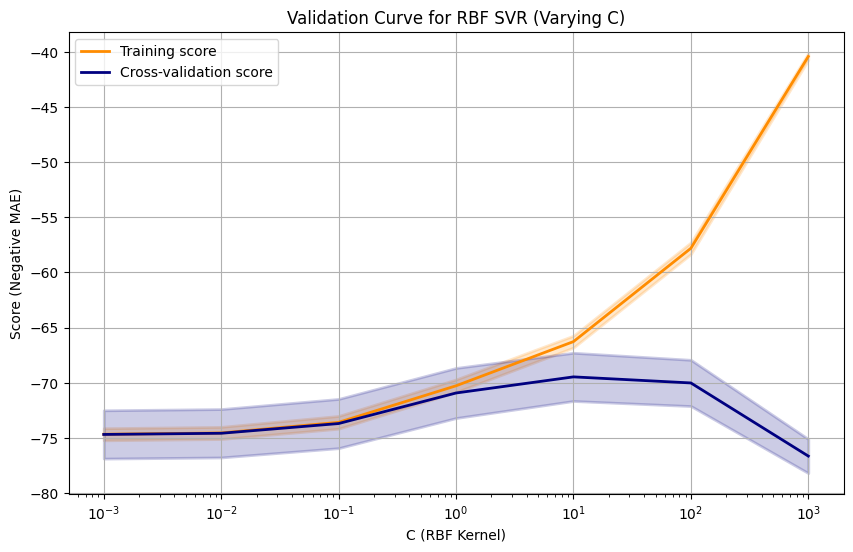


Generating validation curve for RBF SVR (varying gamma)...


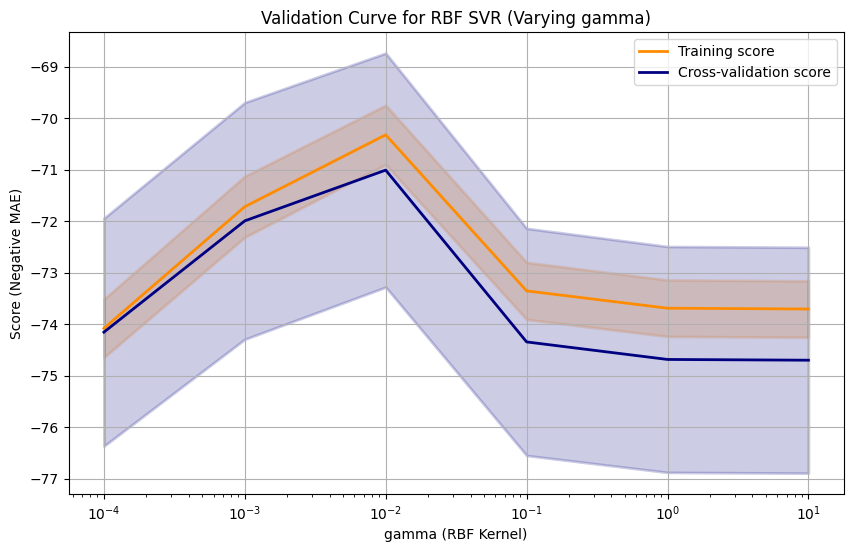


Generating validation curve for Linear SVR (varying C)...


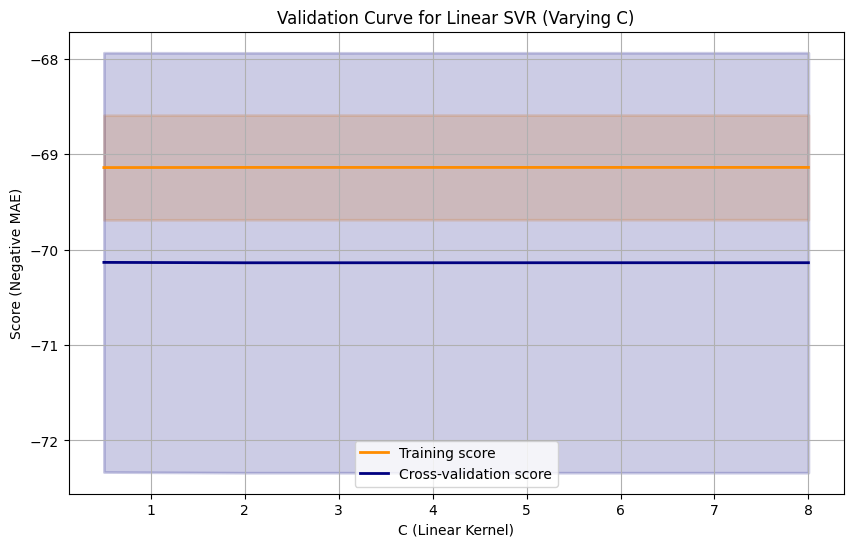


Model-Complexity Curves for SVM models generated.


In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import ShuffleSplit

# Define the scoring metric (negative MAE)
scoring_metric_svm = make_scorer(mean_absolute_error, greater_is_better=False)

# Define the cross-validation strategy (consistent with tuning and learning curves)
cv_strategy_svm_vc = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)


# --- Validation Curve for RBF Kernel SVR (varying C) ---
print("Generating validation curve for RBF SVR (varying C)...")
param_name_rbf_c = "svr__C"
param_range_rbf_c = param_grid_rbf[param_name_rbf_c] # Use the C range from the RBF param_grid

train_scores_rbf_c, test_scores_rbf_c = validation_curve(
    estimator=svr_rbf_pipeline, # Use the RBF pipeline structure
    X=X_subsample_train, # Use the subsampled training data
    y=y_subsample_train, # Use the subsampled training labels
    param_name=param_name_rbf_c,
    param_range=param_range_rbf_c,
    cv=cv_strategy_svm_vc,
    scoring=scoring_metric_svm,
    n_jobs=-1
)

train_scores_mean_rbf_c = np.mean(train_scores_rbf_c, axis=1)
train_scores_std_rbf_c = np.std(train_scores_rbf_c, axis=1)
test_scores_mean_rbf_c = np.mean(test_scores_rbf_c, axis=1)
test_scores_std_rbf_c = np.std(test_scores_rbf_c, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Validation Curve for RBF SVR (Varying C)")
plt.xlabel("C (RBF Kernel)")
plt.ylabel("Score (Negative MAE)")
plt.xscale('log') # Use log scale for C
plt.plot(param_range_rbf_c, train_scores_mean_rbf_c, label="Training score", color="darkorange", lw=2)
plt.fill_between(param_range_rbf_c, train_scores_mean_rbf_c - train_scores_std_rbf_c,
                 train_scores_mean_rbf_c + train_scores_std_rbf_c, alpha=0.2, color="darkorange", lw=2)
plt.plot(param_range_rbf_c, test_scores_mean_rbf_c, label="Cross-validation score", color="navy", lw=2)
plt.fill_between(param_range_rbf_c, test_scores_mean_rbf_c - test_scores_std_rbf_c,
                 test_scores_mean_rbf_c + test_scores_std_rbf_c, alpha=0.2, color="navy", lw=2)
plt.legend(loc="best")
plt.grid()
plt.show()


# Validation Curve for RBF Kernel SVR (varying gamma) ---
print("\nGenerating validation curve for RBF SVR (varying gamma)...")
param_name_rbf_gamma = "svr__gamma"
param_range_rbf_gamma = param_grid_rbf[param_name_rbf_gamma] # Use the gamma range from the RBF param_grid

train_scores_rbf_gamma, test_scores_rbf_gamma = validation_curve(
    estimator=svr_rbf_pipeline, # Use the RBF pipeline structure
    X=X_subsample_train, # Use the subsampled training data
    y=y_subsample_train, # Use the subsampled training labels
    param_name=param_name_rbf_gamma,
    param_range=param_range_rbf_gamma,
    cv=cv_strategy_svm_vc,
    scoring=scoring_metric_svm,
    n_jobs=-1
)

train_scores_mean_rbf_gamma = np.mean(train_scores_rbf_gamma, axis=1)
train_scores_std_rbf_gamma = np.std(train_scores_rbf_gamma, axis=1)
test_scores_mean_rbf_gamma = np.mean(test_scores_rbf_gamma, axis=1)
test_scores_std_rbf_gamma = np.std(test_scores_rbf_gamma, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Validation Curve for RBF SVR (Varying gamma)")
plt.xlabel("gamma (RBF Kernel)")
plt.ylabel("Score (Negative MAE)")
plt.xscale('log') # Use log scale for gamma
plt.plot(param_range_rbf_gamma, train_scores_mean_rbf_gamma, label="Training score", color="darkorange", lw=2)
plt.fill_between(param_range_rbf_gamma, train_scores_mean_rbf_gamma - train_scores_std_rbf_gamma,
                 train_scores_mean_rbf_gamma + train_scores_std_rbf_gamma, alpha=0.2, color="darkorange", lw=2)
plt.plot(param_range_rbf_gamma, test_scores_mean_rbf_gamma, label="Cross-validation score", color="navy", lw=2)
plt.fill_between(param_range_rbf_gamma, test_scores_mean_rbf_gamma - test_scores_std_rbf_gamma,
                 test_scores_mean_rbf_gamma + test_scores_std_rbf_gamma, alpha=0.2, color="navy", lw=2)
plt.legend(loc="best")
plt.grid()
plt.show()


# Validation Curve for Linear Kernel SVR (varying C) ---
print("\nGenerating validation curve for Linear SVR (varying C)...")
param_name_linear_c = "svr__C"
param_range_linear_c = param_grid_linear[param_name_linear_c] # Use the C range from the Linear param_grid

train_scores_linear_c, test_scores_linear_c = validation_curve(
    estimator=svr_linear_pipeline, # Use the Linear pipeline structure
    X=X_subsample_train,
    y=y_subsample_train,
    param_name=param_name_linear_c,
    param_range=param_range_linear_c,
    cv=cv_strategy_svm_vc,
    scoring=scoring_metric_svm,
    n_jobs=-1
)

train_scores_mean_linear_c = np.mean(train_scores_linear_c, axis=1)
train_scores_std_linear_c = np.std(train_scores_linear_c, axis=1)
test_scores_mean_linear_c = np.mean(test_scores_linear_c, axis=1)
test_scores_std_linear_c = np.std(test_scores_linear_c, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Validation Curve for Linear SVR (Varying C)")
plt.xlabel("C (Linear Kernel)")
plt.ylabel("Score (Negative MAE)")
# Linear C is not typically on a log scale in a coarse grid, but can be if specified
# plt.xscale('log')
plt.plot(param_range_linear_c, train_scores_mean_linear_c, label="Training score", color="darkorange", lw=2)
plt.fill_between(param_range_linear_c, train_scores_mean_linear_c - train_scores_std_linear_c,
                 train_scores_mean_linear_c + train_scores_std_linear_c, alpha=0.2, color="darkorange", lw=2)
plt.plot(param_range_linear_c, test_scores_mean_linear_c, label="Cross-validation score", color="navy", lw=2)
plt.fill_between(param_range_linear_c, test_scores_mean_linear_c - test_scores_std_linear_c,
                 test_scores_mean_linear_c + test_scores_std_linear_c, alpha=0.2, color="navy", lw=2)
plt.legend(loc="best")
plt.grid()
plt.show()

print("\nModel-Complexity Curves for SVM models generated.")

### Generate Residual Plots for the Best Performing SVM Model

Generating Residual Plots for the RBF Kernel SVM Model...


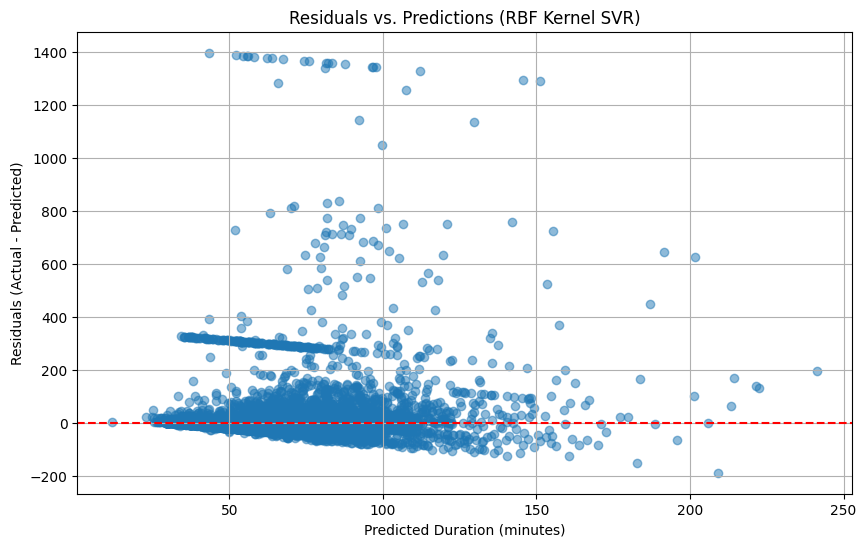


Residual plots generated.


In [ ]:
# Determine which kernel performed best based on the evaluation metrics (e.g., lowest MAE)
best_performing_pipeline = final_svr_rbf_pipeline
best_performing_kernel_name = "RBF"
y_pred_best = final_svr_rbf_pipeline.predict(X_subsample_test)

# Calculate residuals
residuals = y_subsample_test - y_pred_best

print(f"Generating Residual Plots for the {best_performing_kernel_name} Kernel SVM Model...")

# Residuals vs. Predictions Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Duration (minutes)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'Residuals vs. Predictions ({best_performing_kernel_name} Kernel SVR)')
plt.grid(True)
plt.show()

print("\nResidual plots generated.")

### Report Support Vector Fraction

In [ ]:
# Access the trained SVR models from the pipelines
trained_svr_rbf = final_svr_rbf_pipeline.named_steps['svr']
trained_svr_linear = final_svr_linear_pipeline.named_steps['svr']

# Calculate the support vector fraction for RBF kernel
n_support_vectors_rbf = len(trained_svr_rbf.support_vectors_)
total_subsample_train_samples = X_subsample_train.shape[0] # Use the size of the actual training data used for fitting the final models

if total_subsample_train_samples > 0:
    support_vector_fraction_rbf = n_support_vectors_rbf / total_subsample_train_samples
    print(f"Support Vector Fraction (RBF Kernel): {support_vector_fraction_rbf:.4f} ({n_support_vectors_rbf} support vectors out of {total_subsample_train_samples} training samples)")
else:
    print("Cannot calculate Support Vector Fraction for RBF Kernel: Training sample size is zero.")

# Check if support_vectors_ attribute exists for the linear model (it should for SVR with linear kernel)
if hasattr(trained_svr_linear, 'support_vectors_'):
    n_support_vectors_linear = len(trained_svr_linear.support_vectors_)
    if total_subsample_train_samples > 0:
         support_vector_fraction_linear = n_support_vectors_linear / total_subsample_train_samples
         print(f"Support Vector Fraction (Linear Kernel): {support_vector_fraction_linear:.4f} ({n_support_vectors_linear} support vectors out of {total_subsample_train_samples} training samples)")
    else:
        print("Cannot calculate Support Vector Fraction for Linear Kernel: Training sample size is zero.")
else:
    print("Support Vector Fraction not directly available for the Linear Kernel model (SVR(kernel='linear') should have support_vectors_).")

print("\nSupport Vector Fraction reported.")

Support Vector Fraction (RBF Kernel): 1.2469 (19950 support vectors out of 16000 training samples)
Support Vector Fraction (Linear Kernel): 1.2475 (19960 support vectors out of 16000 training samples)

Support Vector Fraction reported.


## Linear SVM


In [ ]:
from sklearn.svm import LinearSVR

# Instantiate the LinearSVR model
# Set max_iter for convergence on a large dataset
linear_svr = LinearSVR(random_state=42, max_iter=10000)

print("LinearSVR model instantiated.")
print(linear_svr)

LinearSVR model instantiated.
LinearSVR(max_iter=10000, random_state=42)


## Define hyperparameter grids



In [ ]:
# Create a dictionary named param_grid_linear_svr to define the hyperparameter grid for LinearSVR.
param_grid_linear_svr = {
    'linear_svr__C': [0.1, 1, 10],
    'linear_svr__epsilon': [0.1, 0.5, 1.0]
}

# Print the created hyperparameter grid dictionary to confirm its structure.
print("Hyperparameter grid for LinearSVR:")
display(param_grid_linear_svr)

Hyperparameter grid for LinearSVR:


{'linear_svr__C': [0.1, 1, 10], 'linear_svr__epsilon': [0.1, 0.5, 1.0]}

## Setup Cross-Validation for Tuning

In [ ]:
from sklearn.model_selection import ShuffleSplit

# Define the cross-validation strategy for tuning
cv_strategy_linear_svr = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

print("ShuffleSplit cross-validation strategy defined:")
display(cv_strategy_linear_svr)

ShuffleSplit cross-validation strategy defined:


ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None)

### Hyperparameter Tuning

In [ ]:
%load_ext memory_profiler

from sklearn.model_selection import RandomizedSearchCV
import time
import warnings
from sklearn.metrics import mean_absolute_error, make_scorer

# Ignore warnings that might arise from specific hyperparameter combinations
warnings.filterwarnings('ignore')

# Define the scoring metric for tuning (using negative MAE)
scoring_metric_linear_svr = make_scorer(mean_absolute_error, greater_is_better=False)

# Create a pipeline for LinearSVR including the scaler
linear_svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svr', LinearSVR(random_state=42, max_iter=10000)) # Use the instantiated LinearSVR
])

print("Starting Hyperparameter Tuning for LinearSVR...")

# Initialize RandomizedSearchCV for LinearSVR
random_search_linear_svr = RandomizedSearchCV(
    estimator=linear_svr_pipeline,
    param_distributions=param_grid_linear_svr,
    n_iter=len(list(GridSearchCV(linear_svr_pipeline, param_grid_linear_svr).param_grid.values())[0]) * len(list(GridSearchCV(linear_svr_pipeline, param_grid_linear_svr).param_grid.values())[1]), # Number of iterations = total number of combinations for a coarse grid
    scoring=scoring_metric_linear_svr,
    cv=cv_strategy_linear_svr,
    random_state=42,
    n_jobs=-1, # Use all available cores
    return_train_score=True
)

start_time_tune_linear_svr = time.time()
# Perform tuning for LinearSVR and measure peak memory usage
%memit random_search_linear_svr.fit(X_train, y_train)
end_time_tune_linear_svr = time.time()

print("\nLinearSVR Hyperparameter Tuning Completed.")
print(f"LinearSVR Tuning Runtime: {end_time_tune_linear_svr - start_time_tune_linear_svr:.2f} seconds")

best_params_linear_svr = random_search_linear_svr.best_params_
best_score_linear_svr = random_search_linear_svr.best_score_

print("\nBest Hyperparameters for LinearSVR:")
display(best_params_linear_svr)
print(f"\nBest cross-validation score (negative MAE) for LinearSVR: {best_score_linear_svr:.4f}")
print(f"Corresponding MAE for LinearSVR: {-best_score_linear_svr:.4f}")

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Starting Hyperparameter Tuning for LinearSVR...
peak memory: 9032.27 MiB, increment: 3050.65 MiB

LinearSVR Hyperparameter Tuning Completed.
LinearSVR Tuning Runtime: 3304.86 seconds

Best Hyperparameters for LinearSVR:


{'linear_svr__epsilon': 0.1, 'linear_svr__C': 0.1}


Best cross-validation score (negative MAE) for LinearSVR: -68.7116
Corresponding MAE for LinearSVR: 68.7116


### Train the Linear SVM Model

In [ ]:
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR # Import LinearSVR

# Train the final LinearSVR model with the best hyperparameters
cleaned_best_params_linear_svr = {key.replace('linear_svr__', ''): value for key, value in best_params_linear_svr.items()}

# Instantiate the final LinearSVR model with best hyperparameters
best_linear_svr = LinearSVR(random_state=42, max_iter=10000, **cleaned_best_params_linear_svr)

# Create a pipeline for the final LinearSVR model (including scaler)
final_linear_svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svr', best_linear_svr)
])

print("Training the final LinearSVR model with best hyperparameters...")
start_time_train_linear_svr = time.time()
# Measure training time and peak memory usage for LinearSVR model
%memit final_linear_svr_pipeline.fit(X_train, y_train)
end_time_train_linear_svr = time.time()
print(f"Final LinearSVR model training time: {end_time_train_linear_svr - start_time_train_linear_svr:.2f} seconds")

print("\nFinal LinearSVR model trained successfully.")

Training the final LinearSVR model with best hyperparameters...
peak memory: 9032.27 MiB, increment: 3050.28 MiB
Final LinearSVR model training time: 41.62 seconds

Final LinearSVR model trained successfully.


### Learning Curve for Linear SVM

Generating learning curve for LinearSVR...


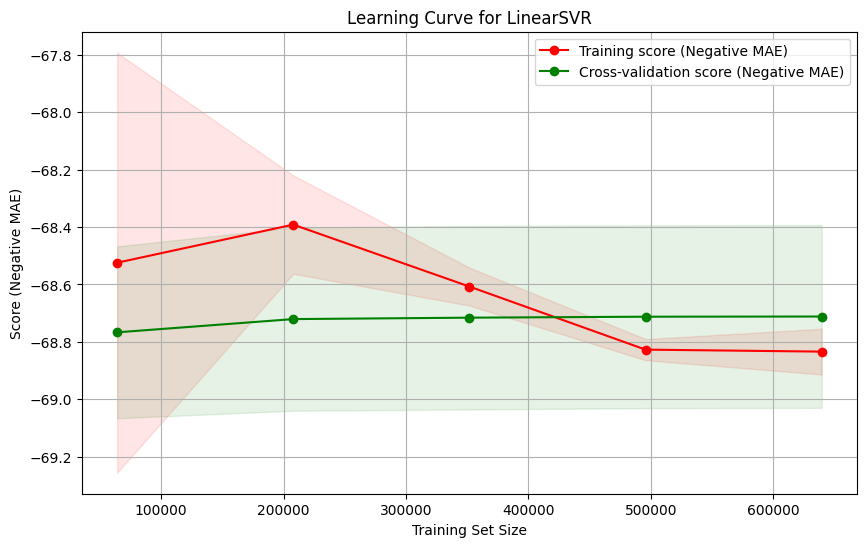

Learning curve for LinearSVR generated.


In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error, make_scorer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

# Define the scoring metric for the learning curve (negative MAE)
learning_curve_scoring_linear_svr = make_scorer(mean_absolute_error, greater_is_better=False)

# Define training set sizes to use for the learning curve
train_sizes_linear_svr = np.linspace(0.1, 1.0, 5) # Use 5 different training set sizes from 10% to 100%

print("Generating learning curve for LinearSVR...")
# Generate the learning curve data
train_sizes_linear_svr, train_scores_linear_svr, test_scores_linear_svr = learning_curve(
    estimator=final_linear_svr_pipeline, # Use the trained final LinearSVR pipeline
    X=X_train, # Use the training data
    y=y_train, # Use the training labels
    train_sizes=train_sizes_linear_svr,
    scoring=learning_curve_scoring_linear_svr,
    cv=cv_strategy_linear_svr, # Use the same CV strategy as tuning
    n_jobs=-1, # Use all available cores
    random_state=42
)

# Calculate the mean and standard deviation for training and test scores
train_scores_mean_linear_svr = np.mean(train_scores_linear_svr, axis=1)
train_scores_std_linear_svr = np.std(train_scores_linear_svr, axis=1)
test_scores_mean_linear_svr = np.mean(test_scores_linear_svr, axis=1)
test_scores_std_linear_svr = np.std(test_scores_linear_svr, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_linear_svr, train_scores_mean_linear_svr - train_scores_std_linear_svr,
                 train_scores_mean_linear_svr + train_scores_std_linear_svr, alpha=0.1, color="r")
plt.fill_between(train_sizes_linear_svr, test_scores_mean_linear_svr - test_scores_std_linear_svr,
                 test_scores_mean_linear_svr + test_scores_std_linear_svr, alpha=0.1, color="g")
plt.plot(train_sizes_linear_svr, train_scores_mean_linear_svr, 'o-', color="r",
         label="Training score (Negative MAE)")
plt.plot(train_sizes_linear_svr, test_scores_mean_linear_svr, 'o-', color="g",
         label="Cross-validation score (Negative MAE)")

plt.xlabel("Training Set Size")
plt.ylabel("Score (Negative MAE)")
plt.title("Learning Curve for LinearSVR")
plt.legend(loc="best")
plt.grid()
plt.show()

print("Learning curve for LinearSVR generated.")

### Evaluate the Final Linear SVM Model

In [ ]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred_linear_svr = final_linear_svr_pipeline.predict(X_test)

# Calculate the regression metrics
mae_linear_svr = mean_absolute_error(y_test, y_pred_linear_svr)
medae_linear_svr = median_absolute_error(y_test, y_pred_linear_svr)
mse_linear_svr = mean_squared_error(y_test, y_pred_linear_svr)

print(f"LinearSVR MAE on Test Set: {mae_linear_svr:.4f}")
print(f"LinearSVR Median AE on Test Set: {medae_linear_svr:.4f}")
print(f"LinearSVR MSE on Test Set: {mse_linear_svr:.4f}")

LinearSVR MAE on Test Set: 69.0262
LinearSVR Median AE on Test Set: 29.3228
LinearSVR MSE on Test Set: 24490.6453


### Validation Curve for Linear SVM

Generating validation curve for LinearSVR (varying C)...


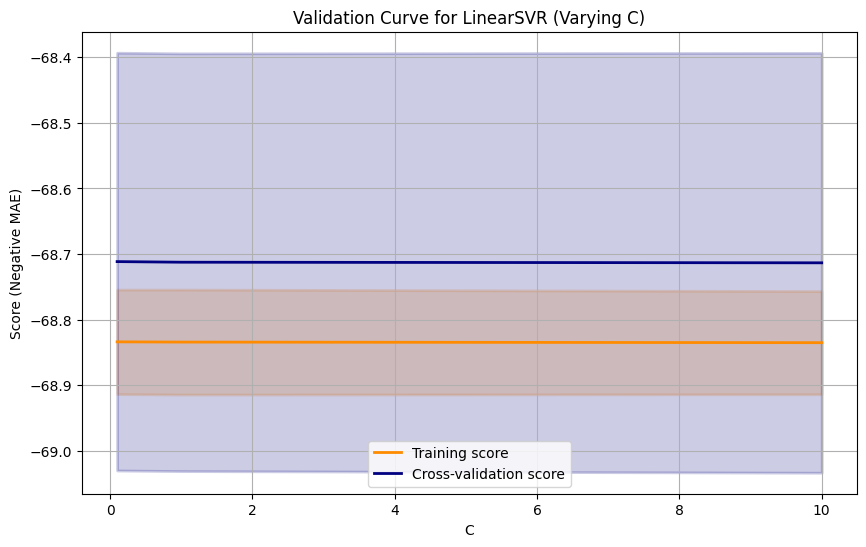


Generating validation curve for LinearSVR (varying epsilon)...


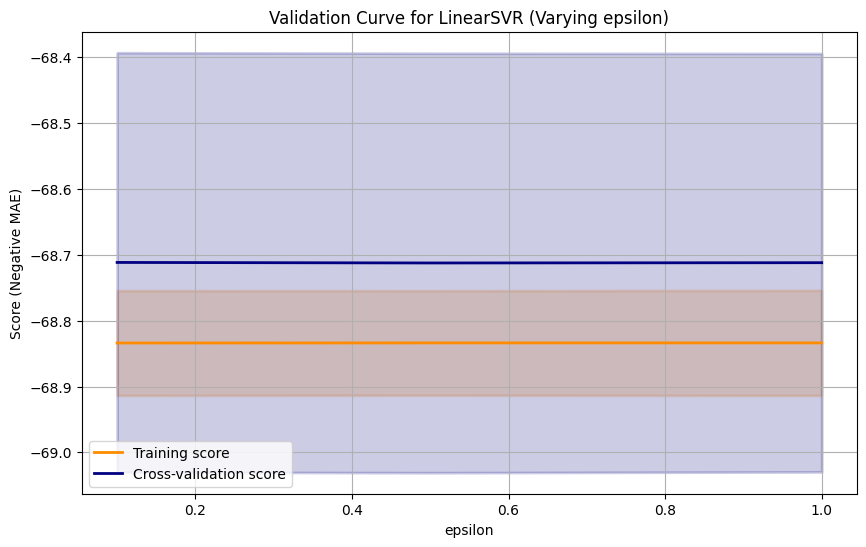


Model-Complexity Curves for LinearSVR generated.


In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import ShuffleSplit

# Define the scoring metric (negative MAE)
scoring_metric_linear_svr_vc = make_scorer(mean_absolute_error, greater_is_better=False)

# Define the cross-validation strategy (consistent with tuning and learning curves)
cv_strategy_linear_svr_vc = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

# --- Validation Curve for LinearSVR (varying C) ---
print("Generating validation curve for LinearSVR (varying C)...")
param_name_linear_svr_c = "linear_svr__C"
param_range_linear_svr_c = param_grid_linear_svr[param_name_linear_svr_c] # Use the C range from the param_grid

train_scores_linear_svr_c, test_scores_linear_svr_c = validation_curve(
    estimator=final_linear_svr_pipeline, # Use the trained final LinearSVR pipeline structure
    X=X_train, # Use the training data
    y=y_train, # Use the training labels
    param_name=param_name_linear_svr_c,
    param_range=param_range_linear_svr_c,
    cv=cv_strategy_linear_svr_vc,
    scoring=scoring_metric_linear_svr_vc,
    n_jobs=-1
)

train_scores_mean_linear_svr_c = np.mean(train_scores_linear_svr_c, axis=1)
train_scores_std_linear_svr_c = np.std(train_scores_linear_svr_c, axis=1)
test_scores_mean_linear_svr_c = np.mean(test_scores_linear_svr_c, axis=1)
test_scores_std_linear_svr_c = np.std(test_scores_linear_svr_c, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Validation Curve for LinearSVR (Varying C)")
plt.xlabel("C")
plt.ylabel("Score (Negative MAE)")
# Linear C is not typically on a log scale in a coarse grid, but can be if specified
# plt.xscale('log')
plt.plot(param_range_linear_svr_c, train_scores_mean_linear_svr_c, label="Training score", color="darkorange", lw=2)
plt.fill_between(param_range_linear_svr_c, train_scores_mean_linear_svr_c - train_scores_std_linear_svr_c,
                 train_scores_mean_linear_svr_c + train_scores_std_linear_svr_c, alpha=0.2, color="darkorange", lw=2)
plt.plot(param_range_linear_svr_c, test_scores_mean_linear_svr_c, label="Cross-validation score", color="navy", lw=2)
plt.fill_between(param_range_linear_svr_c, test_scores_mean_linear_svr_c - test_scores_std_linear_svr_c,
                 test_scores_mean_linear_svr_c + test_scores_std_linear_svr_c, alpha=0.2, color="navy", lw=2)
plt.legend(loc="best")
plt.grid()
plt.show()


# --- Validation Curve for LinearSVR (varying epsilon) ---
print("\nGenerating validation curve for LinearSVR (varying epsilon)...")
param_name_linear_svr_epsilon = "linear_svr__epsilon"
param_range_linear_svr_epsilon = param_grid_linear_svr[param_name_linear_svr_epsilon] # Use the epsilon range from the param_grid

train_scores_linear_svr_epsilon, test_scores_linear_svr_epsilon = validation_curve(
    estimator=final_linear_svr_pipeline, # Use the trained final LinearSVR pipeline structure
    X=X_train, # Use the training data
    y=y_train, # Use the training labels
    param_name=param_name_linear_svr_epsilon,
    param_range=param_range_linear_svr_epsilon,
    cv=cv_strategy_linear_svr_vc,
    scoring=scoring_metric_linear_svr_vc,
    n_jobs=-1
)

train_scores_mean_linear_svr_epsilon = np.mean(train_scores_linear_svr_epsilon, axis=1)
train_scores_std_linear_svr_epsilon = np.std(train_scores_linear_svr_epsilon, axis=1)
test_scores_mean_linear_svr_epsilon = np.mean(test_scores_linear_svr_epsilon, axis=1)
test_scores_std_linear_svr_epsilon = np.std(test_scores_linear_svr_epsilon, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Validation Curve for LinearSVR (Varying epsilon)")
plt.xlabel("epsilon")
plt.ylabel("Score (Negative MAE)")
plt.plot(param_range_linear_svr_epsilon, train_scores_mean_linear_svr_epsilon, label="Training score", color="darkorange", lw=2)
plt.fill_between(param_range_linear_svr_epsilon, train_scores_mean_linear_svr_epsilon - train_scores_std_linear_svr_epsilon,
                 train_scores_mean_linear_svr_epsilon + train_scores_std_linear_svr_epsilon, alpha=0.2, color="darkorange", lw=2)
plt.plot(param_range_linear_svr_epsilon, test_scores_mean_linear_svr_epsilon, label="Cross-validation score", color="navy", lw=2)
plt.fill_between(param_range_linear_svr_epsilon, test_scores_mean_linear_svr_epsilon - test_scores_std_linear_svr_epsilon,
                 test_scores_mean_linear_svr_epsilon + test_scores_std_linear_svr_epsilon, alpha=0.2, color="navy", lw=2)
plt.legend(loc="best")
plt.grid()
plt.show()

print("\nModel-Complexity Curves for LinearSVR generated.")

### Residual Plots

Generating Residual Plots for the LinearSVR Model...


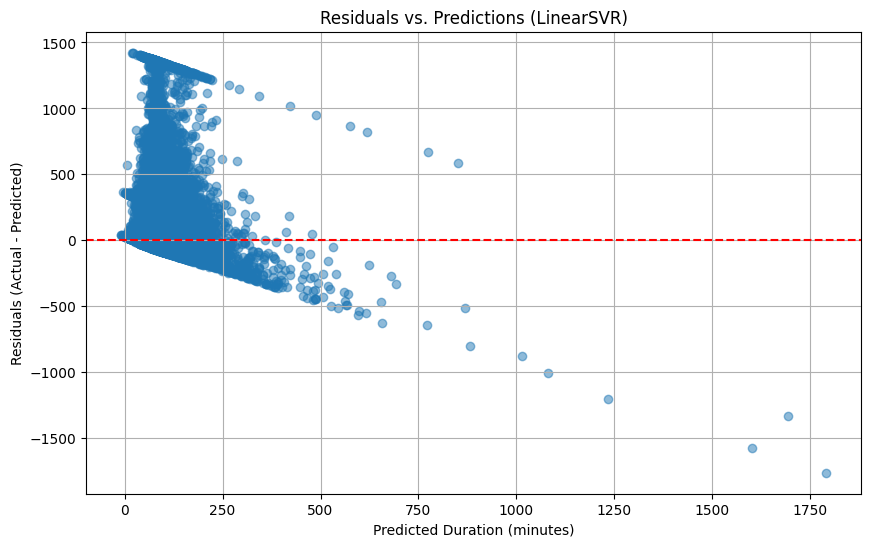


Residual plots generated.


In [ ]:
# Calculate residuals for the LinearSVR model
residuals_linear_svr = y_test - y_pred_linear_svr

print("Generating Residual Plots for the LinearSVR Model...")

# Residuals vs. Predictions Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear_svr, residuals_linear_svr, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Duration (minutes)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predictions (LinearSVR)')
plt.grid(True)
plt.show()

print("\nResidual plots generated.")

## k-NN Model


In [ ]:
# Define the target sample sizes based on constraints
# Halving the target sizes based on user feedback
target_train_size = 250000 // 4
target_test_size = 25000 // 4

# Calculate the fractions needed for subsampling
# Ensure the fraction doesn't exceed 1.0 in case original data is smaller
train_size_fraction = min(target_train_size / len(X_train), 1.0)
test_size_fraction = min(target_test_size / len(X_test), 1.0)

print(f"New target training sample size: {target_train_size}")
print(f"New target test sample size: {target_test_size}")
print(f"Fraction of original training data to sample: {train_size_fraction:.4f}")
print(f"Fraction of original test data to sample: {test_size_fraction:.4f}")

New target training sample size: 62500
New target test sample size: 6250
Fraction of original training data to sample: 0.0782
Fraction of original test data to sample: 0.0313


In [ ]:
from sklearn.model_selection import train_test_split

# Create stratified subsamples of the training data
X_train_subsample, _, y_train_subsample, _ = train_test_split(
    X_train,
    y_train,
    train_size=target_train_size,
    random_state=42,
    stratify=X_train['Severity'] # Stratify using the Severity column from the training features
)

# Create stratified subsamples of the test data
X_test_subsample, _, y_test_subsample, _ = train_test_split(
    X_test,
    y_test,
    test_size=target_test_size,
    random_state=42,
    stratify=X_test['Severity'] # Stratify using the Severity column from the test features
)

# Print the shapes of the subsamples
print("Shape of X_train_subsample:", X_train_subsample.shape)
print("Shape of y_train_subsample:", y_train_subsample.shape)
print("Shape of X_test_subsample:", X_test_subsample.shape)
print("Shape of y_test_subsample:", y_test_subsample.shape)

# Display the severity distribution in the subsampled training set
print("\nSeverity distribution in X_train_subsample:")
display(X_train_subsample['Severity'].value_counts(normalize=True).sort_index())

# Display the severity distribution in the subsampled test set
print("\nSeverity distribution in X_test_subsample:")
display(X_test_subsample['Severity'].value_counts(normalize=True).sort_index())

# Display the severity distribution in the original training set for comparison
print("\nSeverity distribution in original X_train:")
display(X_train['Severity'].value_counts(normalize=True).sort_index())

# Display the severity distribution in the original test set for comparison
print("\nSeverity distribution in original X_test:")
display(X_test['Severity'].value_counts(normalize=True).sort_index())

Shape of X_train_subsample: (62500, 125)
Shape of y_train_subsample: (62500,)
Shape of X_test_subsample: (193653, 125)
Shape of y_test_subsample: (193653,)

Severity distribution in X_train_subsample:


,proportion
Severity,
1,0.008752
2,0.796000
3,0.168880
4,0.026368



Severity distribution in X_test_subsample:


,proportion
Severity,
1,0.008753
2,0.795996
3,0.168879
4,0.026372



Severity distribution in original X_train:


,proportion
Severity,
1,0.008754
2,0.795999
3,0.168876
4,0.026370



Severity distribution in original X_test:


,proportion
Severity,
1,0.008754
2,0.795996
3,0.168877
4,0.026373


### Define the k-nn regressor model


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the KNeighborsRegressor model
knn_regressor = KNeighborsRegressor(metric="euclidean", algorithm="brute", n_jobs=-1)

# Print the instantiated model to verify parameters
print("KNeighborsRegressor model instantiated:")
print(knn_regressor)

KNeighborsRegressor model instantiated:
KNeighborsRegressor(algorithm='brute', metric='euclidean', n_jobs=-1)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.neighbors import KNeighborsRegressor

# Define the scoring metric for tuning (using negative MAE)
scoring_metric_knn = make_scorer(mean_absolute_error, greater_is_better=False)

# Create a pipeline for k-NN including the scaler
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn_regressor', KNeighborsRegressor(metric="euclidean", algorithm="brute", n_jobs=-1)) # Use the instantiated KNeighborsRegressor
])

print("k-NN pipeline and scoring metric defined.")
display(knn_pipeline)

k-NN pipeline and scoring metric defined.


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_regressor',
                 KNeighborsRegressor(algorithm='brute', metric='euclidean',
                                     n_jobs=-1))])

### Hyperprameter Tuning



In [ ]:
# Create a dictionary named param_grid_knn to define the hyperparameter grid for KNeighborsRegressor.
param_grid_knn = {
    'n_neighbors': [3, 5, 11, 21], # Updated k values as requested
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Print the created hyperparameter grid dictionary to confirm its structure.
print("Hyperparameter grid for KNeighborsRegressor:")
display(param_grid_knn)

Hyperparameter grid for KNeighborsRegressor:


{'n_neighbors': [3, 5, 11, 21],
 'weights': ['uniform', 'distance'],
 'metric': ['euclidean', 'manhattan', 'cosine']}

In [ ]:
from sklearn.model_selection import ShuffleSplit

# Define the cross-validation strategy for tuning
cv_strategy_knn = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

print("ShuffleSplit cross-validation strategy defined:")
display(cv_strategy_knn)

ShuffleSplit cross-validation strategy defined:


ShuffleSplit(n_splits=3, random_state=42, test_size=0.2, train_size=None)

In [ ]:
# Fix the hyperparameter grid names to work with the pipeline
param_grid_knn_fixed = {
    'knn_regressor__n_neighbors': param_grid_knn['n_neighbors'],
    'knn_regressor__weights': param_grid_knn['weights'],
    'knn_regressor__metric': param_grid_knn['metric']
}

print("Fixed Hyperparameter grid for KNeighborsRegressor within the pipeline:")
display(param_grid_knn_fixed)

# Initialize RandomizedSearchCV with the fixed parameter grid
random_search_knn = RandomizedSearchCV(
    estimator=knn_pipeline,
    param_distributions=param_grid_knn_fixed, # Use the fixed grid
    n_iter=10,
    scoring=scoring_metric_knn,
    cv=cv_strategy_knn,
    random_state=42,
    n_jobs=-1, # Use all available cores
    return_train_score=True
)

print("\nStarting Hyperparameter Tuning for k-NN Regressor with fixed grid...")

start_time_tune_knn = time.time()
# Fit RandomizedSearchCV and measure peak memory usage
%memit random_search_knn.fit(X_train_subsample, y_train_subsample)
end_time_tune_knn = time.time()

print("\nk-NN Regressor Hyperparameter Tuning Completed.")
print(f"k-NN Tuning Runtime: {end_time_tune_knn - start_time_tune_knn:.2f} seconds")

# Get the best hyperparameters and best score
best_params_knn = random_search_knn.best_params_
best_score_knn = random_search_knn.best_score_

print("\nBest Hyperparameters for k-NN Regressor:")
display(best_params_knn)
print(f"\nBest cross-validation score (negative MAE) for k-NN: {best_score_knn:.4f}")
print(f"Corresponding MAE for k-NN: {-best_score_knn:.4f}")

Fixed Hyperparameter grid for KNeighborsRegressor within the pipeline:


{'knn_regressor__n_neighbors': [3, 5, 11, 21],
 'knn_regressor__weights': ['uniform', 'distance'],
 'knn_regressor__metric': ['euclidean', 'manhattan', 'cosine']}


Starting Hyperparameter Tuning for k-NN Regressor with fixed grid...
peak memory: 6696.71 MiB, increment: 119.32 MiB

k-NN Regressor Hyperparameter Tuning Completed.
k-NN Tuning Runtime: 920.33 seconds

Best Hyperparameters for k-NN Regressor:


{'knn_regressor__weights': 'distance',
 'knn_regressor__n_neighbors': 11,
 'knn_regressor__metric': 'manhattan'}


Best cross-validation score (negative MAE) for k-NN: -80.8629
Corresponding MAE for k-NN: 80.8629


## Train the Final k-NN Model

In [ ]:
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Train the final k-NN model with the best hyperparameters
# Clean the best_params_knn dictionary to remove the pipeline step prefix
cleaned_best_params_knn = {key.replace('knn_regressor__', ''): value for key, value in best_params_knn.items()}

# Instantiate the final KNeighborsRegressor model with best hyperparameters
best_knn_regressor = KNeighborsRegressor(n_jobs=-1, **cleaned_best_params_knn)

# Create a pipeline for the final k-NN model (including scaler)
final_knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn_regressor', best_knn_regressor)
])

print("Training the final k-NN Regressor model with best hyperparameters...")
start_time_train_knn = time.time()
# Measure training time and peak memory usage for k-NN model
%memit final_knn_pipeline.fit(X_train_subsample, y_train_subsample)
end_time_train_knn = time.time()
print(f"Final k-NN model training time: {end_time_train_knn - start_time_train_knn:.2f} seconds")

print("\nFinal k-NN Regressor model trained successfully.")

Training the final k-NN Regressor model with best hyperparameters...
peak memory: 6637.22 MiB, increment: 59.61 MiB
Final k-NN model training time: 1.52 seconds

Final k-NN Regressor model trained successfully.


## Evaluate the Final k-NN Model

In [ ]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error

# Make predictions on the subsampled test set
y_pred_knn = final_knn_pipeline.predict(X_test_subsample)

# Calculate the regression metrics
mae_knn = mean_absolute_error(y_test_subsample, y_pred_knn)
medae_knn = median_absolute_error(y_test_subsample, y_pred_knn)
mse_knn = mean_squared_error(y_test_subsample, y_pred_knn)

print(f"k-NN Regressor MAE on Subsampled Test Set: {mae_knn:.4f}")
print(f"k-NN Regressor Median AE on Subsampled Test Set: {medae_knn:.4f}")
print(f"k-NN Regressor MSE on Subsampled Test Set: {mse_knn:.4f}")


k-NN Regressor MAE on Subsampled Test Set: 81.3084
k-NN Regressor Median AE on Subsampled Test Set: 46.9846
k-NN Regressor MSE on Subsampled Test Set: 22681.0480

Justification for Median Absolute Error:
Median Absolute Error (MedAE) is a robust metric to outliers compared to Mean Absolute Error (MAE) and Mean Squared Error (MSE). Since accident duration data often contains outliers (e.g., very long durations due to severe accidents or logging errors), MedAE provides a more representative measure of the typical prediction error, less influenced by extreme values.


## Generate Learning Curve for k-NN

Generating learning curve for k-NN Regressor...


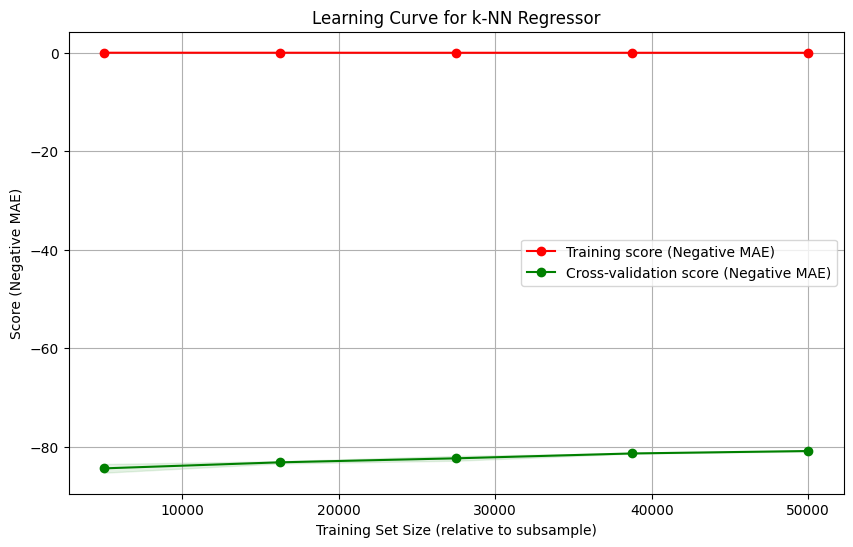

Learning curve for k-NN Regressor generated.


In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error, make_scorer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

# Define the scoring metric for the learning curve (negative MAE)
learning_curve_scoring_knn = make_scorer(mean_absolute_error, greater_is_better=False)

# Define training set sizes to use for the learning curve (relative to subsample size)
train_sizes_knn = np.linspace(0.1, 1.0, 5) # Use 5 different training set sizes from 10% to 100% of subsample

print("Generating learning curve for k-NN Regressor...")
# Generate the learning curve data
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(
    estimator=final_knn_pipeline, # Use the trained final k-NN pipeline
    X=X_train_subsample, # Use the subsampled training data
    y=y_train_subsample, # Use the subsampled training labels
    train_sizes=train_sizes_knn,
    scoring=learning_curve_scoring_knn,
    cv=ShuffleSplit(n_splits=3, test_size=0.2, random_state=42), # Use ShuffleSplit for CV on subsample
    n_jobs=-1, # Use all available cores
    random_state=42
)

# Calculate the mean and standard deviation for training and test scores
train_scores_mean_knn = np.mean(train_scores_knn, axis=1)
train_scores_std_knn = np.std(train_scores_knn, axis=1)
test_scores_mean_knn = np.mean(test_scores_knn, axis=1)
test_scores_std_knn = np.std(test_scores_knn, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_knn, train_scores_mean_knn - train_scores_std_knn,
                 train_scores_mean_knn + train_scores_std_knn, alpha=0.1, color="r")
plt.fill_between(train_sizes_knn, test_scores_mean_knn - test_scores_std_knn,
                 test_scores_mean_knn + test_scores_std_knn, alpha=0.1, color="g")
plt.plot(train_sizes_knn, train_scores_mean_knn, 'o-', color="r",
         label="Training score (Negative MAE)")
plt.plot(train_sizes_knn, test_scores_mean_knn, 'o-', color="g",
         label="Cross-validation score (Negative MAE)")

plt.xlabel("Training Set Size (relative to subsample)")
plt.ylabel("Score (Negative MAE)")
plt.title("Learning Curve for k-NN Regressor")
plt.legend(loc="best")
plt.grid()
plt.show()

print("Learning curve for k-NN Regressor generated.")

## Generate Validation Curve for k-NN

Generating validation curve for k-NN (varying n_neighbors)...


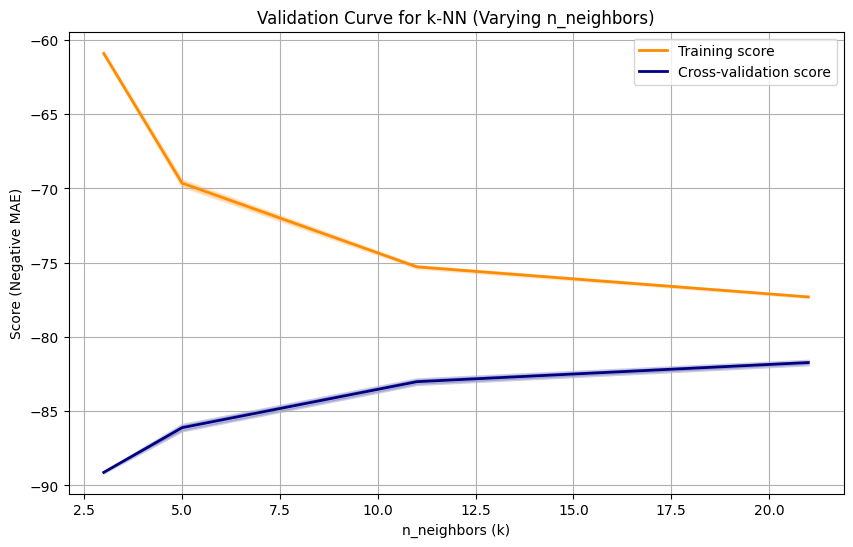


Model-Complexity Curves for k-NN generated.


In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import ShuffleSplit

# Define the scoring metric (negative MAE)
scoring_metric_knn_vc = make_scorer(mean_absolute_error, greater_is_better=False)

# Define the cross-validation strategy (consistent with tuning and learning curves)
cv_strategy_knn_vc = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

# --- Validation Curve for k-NN (varying n_neighbors) ---
print("Generating validation curve for k-NN (varying n_neighbors)...")
param_name_knn_k = "knn_regressor__n_neighbors"
param_range_knn_k = param_grid_knn_fixed[param_name_knn_k] # Use the n_neighbors range from the fixed param_grid

train_scores_knn_k, test_scores_knn_k = validation_curve(
    estimator=knn_pipeline, # Use the k-NN pipeline structure
    X=X_train_subsample, # Use the subsampled training data
    y=y_train_subsample, # Use the subsampled training labels
    param_name=param_name_knn_k,
    param_range=param_range_knn_k,
    cv=cv_strategy_knn_vc,
    scoring=scoring_metric_knn_vc,
    n_jobs=-1
)

train_scores_mean_knn_k = np.mean(train_scores_knn_k, axis=1)
train_scores_std_knn_k = np.std(train_scores_knn_k, axis=1)
test_scores_mean_knn_k = np.mean(test_scores_knn_k, axis=1)
test_scores_std_knn_k = np.std(test_scores_knn_k, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Validation Curve for k-NN (Varying n_neighbors)")
plt.xlabel("n_neighbors (k)")
plt.ylabel("Score (Negative MAE)")
plt.plot(param_range_knn_k, train_scores_mean_knn_k, label="Training score", color="darkorange", lw=2)
plt.fill_between(param_range_knn_k, train_scores_mean_knn_k - train_scores_std_knn_k,
                 train_scores_mean_knn_k + train_scores_std_knn_k, alpha=0.2, color="darkorange", lw=2)
plt.plot(param_range_knn_k, test_scores_mean_knn_k, label="Cross-validation score", color="navy", lw=2)
plt.fill_between(param_range_knn_k, test_scores_mean_knn_k - test_scores_std_knn_k,
                 test_scores_mean_knn_k + test_scores_std_knn_k, alpha=0.2, color="navy", lw=2)
plt.legend(loc="best")
plt.grid()
plt.show()


print("\nModel-Complexity Curves for k-NN generated.")

## Generate Residual Plots for k-NN

Generating Residual Plots for the k-NN Regressor Model...


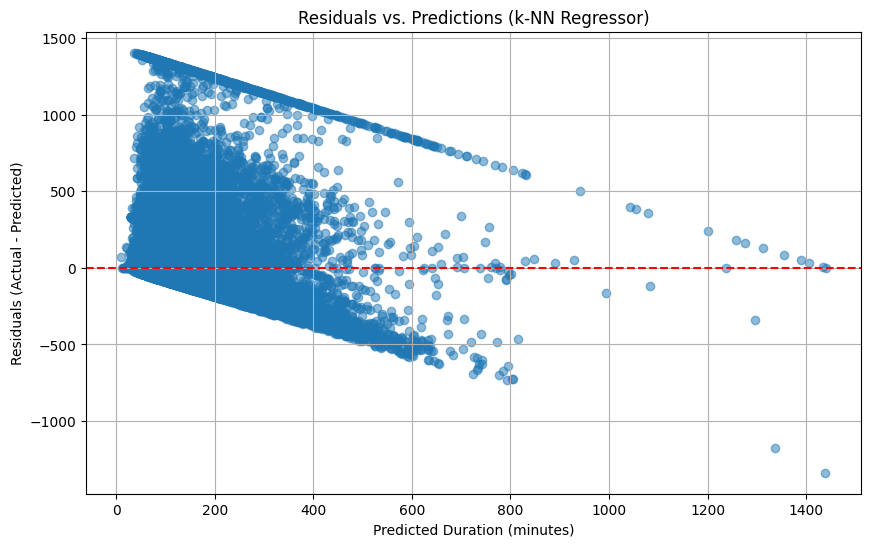


Residual plots generated.


In [ ]:
# Calculate residuals for the k-NN model
residuals_knn = y_test_subsample - y_pred_knn

print("Generating Residual Plots for the k-NN Regressor Model...")

# Residuals vs. Predictions Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_knn, residuals_knn, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Duration (minutes)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predictions (k-NN Regressor)')
plt.grid(True)
plt.show()


print("\nResidual plots generated.")